## Importing necessary libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import IncrementalPCA

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from imblearn.over_sampling import SMOTE

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Displaying all Columns without restrictions
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

## Reading and understanding data:

In [2]:
# Reading the dataset.
df = pd.read_csv('telecom_churn_data.csv')
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [3]:
# Checking the dimensions of the dataset.
df.shape

(99999, 226)

In [4]:
# Checking the informations of the dataset.
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [5]:
# Checking the statistical info of the dataset.
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [6]:
# Checking if any duplicates present.
df.duplicated().sum()

0

In [7]:
# Checking datatypes
df.dtypes

mobile_number               int64  
circle_id                   int64  
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object 
last_date_of_month_7        object 
last_date_of_month_8        object 
last_date_of_month_9        object 
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               

## Data Preparation :

In [8]:
# Creating column name list based on their type.
id_cols = ['mobile_number', 'circle_id']
date_cols = ['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9']
cat_cols =  ['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9','fb_user_6','fb_user_7','fb_user_8','fb_user_9']
num_cols = [column for column in df.columns if column not in id_cols + date_cols + cat_cols]

In [9]:
# Changing names of 'aug_vbc_3g','jul_vbc_3g','jun_vbc_3g','sep_vbc_3g',columns to match others
df.rename(columns = {'jun_vbc_3g':'vbc_3g_6', 'jul_vbc_3g':'vbc_3g_7', 'aug_vbc_3g':'vbc_3g_8', 'sep_vbc_3g':'vbc_3g_9'}, inplace = True)

In [10]:
# changing datatype of date column to datetime.
df[date_cols] = df[date_cols].apply(pd.to_datetime)

In [11]:
# Checking if datatypes change correctly.
df[date_cols].dtypes

last_date_of_month_6        datetime64[ns]
last_date_of_month_7        datetime64[ns]
last_date_of_month_8        datetime64[ns]
last_date_of_month_9        datetime64[ns]
date_of_last_rech_6         datetime64[ns]
date_of_last_rech_7         datetime64[ns]
date_of_last_rech_8         datetime64[ns]
date_of_last_rech_9         datetime64[ns]
date_of_last_rech_data_6    datetime64[ns]
date_of_last_rech_data_7    datetime64[ns]
date_of_last_rech_data_8    datetime64[ns]
date_of_last_rech_data_9    datetime64[ns]
dtype: object

In [12]:
# Dropping circle_id and mobile number column as these columns have only one unique value. 
# Hence there will be no impact of these columns on the data analysis.

df = df.drop(id_cols, axis=1)

In [13]:
# Creating list of columns with only one value.
list_one_val = ["std_og_t2c_mou_6","std_og_t2c_mou_7","std_og_t2c_mou_8","std_og_t2c_mou_9","std_ic_t2o_mou_6","std_ic_t2o_mou_7","std_ic_t2o_mou_8","std_ic_t2o_mou_9","loc_og_t2o_mou","std_og_t2o_mou","loc_ic_t2o_mou"]

In [14]:
df[list_one_val].describe()

,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou
count,96062.0,96140.0,94621.0,92254.0,96062.0,96140.0,94621.0,92254.0,98981.0,98981.0,98981.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
#list_wt_one_val columns are having only 0 value and missing values less than 4. Hence deleting these columns
df = df.drop(list_one_val, axis=1)

In [16]:
# Checking the dimensions of the dataset.
df.shape

(99999, 213)

### Missing values handling:

In [17]:
# Cheking percent of missing values in columns
round(((df.isnull().sum()/len(df.index))*100),2).sort_values(ascending=False)

total_rech_data_6           74.85
fb_user_6                   74.85
arpu_2g_6                   74.85
arpu_3g_6                   74.85
night_pck_user_6            74.85
date_of_last_rech_data_6    74.85
av_rech_amt_data_6          74.85
max_rech_data_6             74.85
count_rech_2g_6             74.85
count_rech_3g_6             74.85
count_rech_2g_7             74.43
fb_user_7                   74.43
night_pck_user_7            74.43
date_of_last_rech_data_7    74.43
total_rech_data_7           74.43
max_rech_data_7             74.43
arpu_3g_7                   74.43
arpu_2g_7                   74.43
av_rech_amt_data_7          74.43
count_rech_3g_7             74.43
arpu_3g_9                   74.08
fb_user_9                   74.08
count_rech_2g_9             74.08
night_pck_user_9            74.08
arpu_2g_9                   74.08
date_of_last_rech_data_9    74.08
av_rech_amt_data_9          74.08
count_rech_3g_9             74.08
max_rech_data_9             74.08
total_rech_dat

#### Missing values greater than 70:

In [18]:
# Checking columns with null values greater than 70 in month 6.

df_6 = df[df.columns[df.columns.str.endswith(pat ='_6')]]
df_6.loc[:,df_6[df_6.columns].isnull().mean()*100>70].head()

,date_of_last_rech_data_6,total_rech_data_6,max_rech_data_6,count_rech_2g_6,count_rech_3g_6,av_rech_amt_data_6,arpu_3g_6,arpu_2g_6,night_pck_user_6,fb_user_6
0,2014-06-21,1.0,252.0,0.0,1.0,252.0,212.17,212.17,0.0,1.0
1,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-06-04,1.0,56.0,1.0,0.0,56.0,0.00,0.00,0.0,0.0


In [19]:
# Checking columns with null values greater than 70 in month 7.

df_7 = df[df.columns[df.columns.str.endswith(pat ='_7')]]
df_7.loc[:,df_7[df_7.columns].isnull().mean()*100>70].head()

,date_of_last_rech_data_7,total_rech_data_7,max_rech_data_7,count_rech_2g_7,count_rech_3g_7,av_rech_amt_data_7,arpu_3g_7,arpu_2g_7,night_pck_user_7,fb_user_7
0,2014-07-16,1.0,252.0,0.0,1.0,252.0,212.17,212.17,0.0,1.0
1,2014-07-25,1.0,154.0,1.0,0.0,154.0,0.00,28.61,0.0,1.0
2,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# Checking columns with null values greater than 70 in month 8.

df_8 = df[df.columns[df.columns.str.endswith(pat ='_8')]]
df_8.loc[:,df_8[df_8.columns].isnull().mean()*100>70].head()

,date_of_last_rech_data_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,arpu_3g_8,arpu_2g_8,night_pck_user_8,fb_user_8
0,2014-08-08,1.0,252.0,0.0,1.0,252.0,212.17,212.17,0.0,1.0
1,2014-08-10,2.0,25.0,2.0,0.0,50.0,0.00,7.60,0.0,1.0
2,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# Checking columns with null values greater than 70 in month 9.

df_9 = df[df.columns[df.columns.str.endswith(pat ='_9')]]
df_9.loc[:,df_9[df_9.columns].isnull().mean()*100>70].head()

,date_of_last_rech_data_9,total_rech_data_9,max_rech_data_9,count_rech_2g_9,count_rech_3g_9,av_rech_amt_data_9,arpu_3g_9,arpu_2g_9,night_pck_user_9,fb_user_9
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-09-17,1.0,46.0,1.0,0.0,46.0,2.84,0.0,0.0,1.0
3,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Other missing values for month 6:

In [22]:
ic_6_cols = list(df.filter(regex='(.*)ic(.+)6', axis=1).columns)
ic_6_cols.extend(["onnet_mou_6","offnet_mou_6"])
og_6_cols= list(df.filter(regex='(.*)og(.+)6', axis=1).columns)

In [23]:
df[ic_6_cols][df[ic_6_cols].isnull().any(axis=1)].head()

,roam_ic_mou_6,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,loc_ic_mou_6,std_ic_t2t_mou_6,std_ic_t2m_mou_6,std_ic_t2f_mou_6,std_ic_mou_6,total_ic_mou_6,spl_ic_mou_6,isd_ic_mou_6,ic_others_6,onnet_mou_6,offnet_mou_6
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN


In [24]:
df[og_6_cols][df[og_6_cols].isnull().any(axis=1)].head()

,roam_og_mou_6,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_mou_6,std_og_t2t_mou_6,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_mou_6,isd_og_mou_6,spl_og_mou_6,og_others_6,total_og_mou_6
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


#### Other missing values for month 7:

In [25]:
ic_7_cols = list(df.filter(regex='(.*)ic(.+)7', axis=1).columns)
ic_7_cols.extend(["onnet_mou_7","offnet_mou_7"])
og_7_cols= list(df.filter(regex='(.*)og(.+)7', axis=1).columns)

In [26]:
df[ic_7_cols][df[ic_7_cols].isnull().any(axis=1)].head()

,roam_ic_mou_7,loc_ic_t2t_mou_7,loc_ic_t2m_mou_7,loc_ic_t2f_mou_7,loc_ic_mou_7,std_ic_t2t_mou_7,std_ic_t2m_mou_7,std_ic_t2f_mou_7,std_ic_mou_7,total_ic_mou_7,spl_ic_mou_7,isd_ic_mou_7,ic_others_7,onnet_mou_7,offnet_mou_7
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN


In [27]:
df[og_7_cols][df[og_7_cols].isnull().any(axis=1)].head()

,roam_og_mou_7,loc_og_t2t_mou_7,loc_og_t2m_mou_7,loc_og_t2f_mou_7,loc_og_t2c_mou_7,loc_og_mou_7,std_og_t2t_mou_7,std_og_t2m_mou_7,std_og_t2f_mou_7,std_og_mou_7,isd_og_mou_7,spl_og_mou_7,og_others_7,total_og_mou_7
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


#### Other missing values for month 8:

In [28]:
ic_8_cols = list(df.filter(regex='(.*)ic(.+)8', axis=1).columns)
ic_8_cols.extend(["onnet_mou_8","offnet_mou_8"])
og_8_cols= list(df.filter(regex='(.*)og(.+)8', axis=1).columns)

In [29]:
df[ic_8_cols][df[ic_8_cols].isnull().any(axis=1)].head()

,roam_ic_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,onnet_mou_8,offnet_mou_8
35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN


In [30]:
df[og_8_cols][df[og_8_cols].isnull().any(axis=1)].head()

,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8
35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


#### Other missing values for month 9:

In [31]:
ic_9_cols = list(df.filter(regex='(.*)ic(.+)9', axis=1).columns)
ic_9_cols.extend(["onnet_mou_9","offnet_mou_9"])
og_9_cols= list(df.filter(regex='(.*)og(.+)9', axis=1).columns)

In [32]:
df[ic_9_cols][df[ic_9_cols].isnull().any(axis=1)].head()

,roam_ic_mou_9,loc_ic_t2t_mou_9,loc_ic_t2m_mou_9,loc_ic_t2f_mou_9,loc_ic_mou_9,std_ic_t2t_mou_9,std_ic_t2m_mou_9,std_ic_t2f_mou_9,std_ic_mou_9,total_ic_mou_9,spl_ic_mou_9,isd_ic_mou_9,ic_others_9,onnet_mou_9,offnet_mou_9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN


In [33]:
df[og_9_cols][df[og_9_cols].isnull().any(axis=1)].head()

,roam_og_mou_9,loc_og_t2t_mou_9,loc_og_t2m_mou_9,loc_og_t2f_mou_9,loc_og_t2c_mou_9,loc_og_mou_9,std_og_t2t_mou_9,std_og_t2m_mou_9,std_og_t2f_mou_9,std_og_mou_9,isd_og_mou_9,spl_og_mou_9,og_others_9,total_og_mou_9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [34]:
# Crearting list of columns to impute missing values
impute_list = ic_6_cols + og_6_cols + ic_7_cols + og_7_cols + ic_8_cols + og_8_cols + ic_9_cols + og_9_cols

In [35]:
len(impute_list)

116

In [36]:
# Dropping date columns. As they are not that usefull for modelling.
df.drop(date_cols,axis=1,inplace=True)

#### Missing value Imputations:

It is observed that the data recharge date and the all other missing together which means the customer didn't recharge.
Hence missing value is imputed with '0' indicating no recharge.

And it is observed all ic mou and og mou columns have missing values when their corresponding total_ic_mou and total_og_mou have 0.0 value, hence imputing these columns also with '0'.

In [37]:
# create a list of recharge columns where we will impute missing values.
zero_impute = []
for col in df.columns:
    if round(((df[col].isnull().sum()/len(df.index))*100),2) > 70 and col not in date_cols:
        zero_impute.append(col)

zero_impute.extend(impute_list)

In [38]:
# Checking length of imputation list
len(zero_impute)

152

In [39]:
# Imputing missing values
df[zero_impute] = df[zero_impute].apply(lambda x: x.fillna(0))

In [40]:
# Verifying the data
round(((df.isnull().sum()/len(df.index))*100),2).sort_values(ascending=False)

arpu_6                0.0
total_rech_data_8     0.0
max_rech_amt_6        0.0
max_rech_amt_7        0.0
max_rech_amt_8        0.0
max_rech_amt_9        0.0
last_day_rch_amt_6    0.0
last_day_rch_amt_7    0.0
last_day_rch_amt_8    0.0
last_day_rch_amt_9    0.0
total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_9     0.0
std_ic_mou_7          0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
count_rech_2g_6       0.0
count_rech_2g_7       0.0
count_rech_2g_8       0.0
count_rech_2g_9       0.0
count_rech_3g_6       0.0
count_rech_3g_7       0.0
total_rech_amt_9      0.0
total_rech_amt_8      0.0
total_rech_amt_7      0.0
total_rech_amt_6      0.0
std_ic_mou_9          0.0
total_ic_mou_6        0.0
total_ic_mou_7        0.0
total_ic_mou_8        0.0
total_ic_mou_9        0.0
spl_ic_mou_6          0.0
spl_ic_mou_7          0.0
spl_ic_mou_8          0.0
spl_ic_mou_9          0.0
isd_ic_mou_6          0.0
isd_ic_mou_7

In [41]:
# Checking shape again
df.shape

(99999, 201)

### Filtering high-value customers:

In [42]:
#Getting the top 30% customers based on the sum of recharges in month 6 and 7.
high_value_cust=df[df[['total_rech_amt_6', 'total_rech_amt_7','av_rech_amt_data_6','av_rech_amt_data_7']].mean(axis=1)> 
                   df[['total_rech_amt_6', 'total_rech_amt_7','av_rech_amt_data_6','av_rech_amt_data_7']].mean(axis=1).quantile(0.7)]

In [43]:
# Checking shape again.
high_value_cust.shape

(29949, 201)

### Churn Derivation:

Tagging churners and removing attributes of the churn phase.

Now tagging the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase.

The attributes used to tag churners are:

total_ic_mou_9

total_og_mou_9

vol_2g_mb_9

vol_3g_mb_9

In [44]:
# Those who have not used either calls or internet in  September are churned customers

# Let's denote 0 as not churn and  1 as churn
high_value_cust['churn'] = high_value_cust.apply(lambda row: 1 if (row.total_ic_mou_9 == 0 and row.total_og_mou_9 == 0 and row.vol_2g_mb_9 == 0 and row.vol_3g_mb_9 == 0) else 0, axis=1)

In [45]:
# Verifing that the churn is tagged correctly
high_value_cust[['churn','total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].head()

,churn,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
0,1,0.00,0.00,0.0,0.0
7,1,0.00,0.00,0.0,0.0
8,0,34.91,142.18,0.0,0.0
16,0,334.56,255.74,0.0,0.0
21,0,252.61,1031.53,0.0,0.0


After tagging churners, removing all the attributes corresponding to the churn phase - all attributes having ‘ _9’, etc. in their names.

In [46]:
# Get the columns whose name ends with _9 attribute
month_9_cols = high_value_cust.columns[high_value_cust.columns.str.endswith(pat = '_9')]
month_9_cols = list(month_9_cols)

In [47]:
# Checking number columns having attribute for month 9.
len(month_9_cols)

50

In [48]:
# Dropping columns having attributes for month 9
high_value_cust.drop(month_9_cols,axis=1, inplace=True)

In [49]:
# Checking shape again
high_value_cust.shape

(29949, 152)

### Deriving new features:

In [50]:
#calculate difference variable as the difference between 8th month and the average of 6th and 7th month.

high_value_cust['arpu_diff'] = high_value_cust.arpu_8 - ((high_value_cust.arpu_6 + high_value_cust.arpu_7)/2)

high_value_cust['onnet_mou_diff'] = high_value_cust.onnet_mou_8 - ((high_value_cust.onnet_mou_6 + high_value_cust.onnet_mou_7)/2)

high_value_cust['offnet_mou_diff'] = high_value_cust.offnet_mou_8 - ((high_value_cust.offnet_mou_6 + high_value_cust.offnet_mou_7)/2)

high_value_cust['roam_ic_mou_diff'] = high_value_cust.roam_ic_mou_8 - ((high_value_cust.roam_ic_mou_6 + high_value_cust.roam_ic_mou_7)/2)

high_value_cust['roam_og_mou_diff'] = high_value_cust.roam_og_mou_8 - ((high_value_cust.roam_og_mou_6 + high_value_cust.roam_og_mou_7)/2)

high_value_cust['loc_og_mou_diff'] = high_value_cust.loc_og_mou_8 - ((high_value_cust.loc_og_mou_6 + high_value_cust.loc_og_mou_7)/2)

high_value_cust['std_og_mou_diff'] = high_value_cust.std_og_mou_8 - ((high_value_cust.std_og_mou_6 + high_value_cust.std_og_mou_7)/2)

high_value_cust['isd_og_mou_diff'] = high_value_cust.isd_og_mou_8 - ((high_value_cust.isd_og_mou_6 + high_value_cust.isd_og_mou_7)/2)

high_value_cust['spl_og_mou_diff'] = high_value_cust.spl_og_mou_8 - ((high_value_cust.spl_og_mou_6 + high_value_cust.spl_og_mou_7)/2)

high_value_cust['total_og_mou_diff'] = high_value_cust.total_og_mou_8 - ((high_value_cust.total_og_mou_6 + high_value_cust.total_og_mou_7)/2)

high_value_cust['loc_ic_mou_diff'] = high_value_cust.loc_ic_mou_8 - ((high_value_cust.loc_ic_mou_6 + high_value_cust.loc_ic_mou_7)/2)

high_value_cust['std_ic_mou_diff'] = high_value_cust.std_ic_mou_8 - ((high_value_cust.std_ic_mou_6 + high_value_cust.std_ic_mou_7)/2)

high_value_cust['isd_ic_mou_diff'] = high_value_cust.isd_ic_mou_8 - ((high_value_cust.isd_ic_mou_6 + high_value_cust.isd_ic_mou_7)/2)

high_value_cust['spl_ic_mou_diff'] = high_value_cust.spl_ic_mou_8 - ((high_value_cust.spl_ic_mou_6 + high_value_cust.spl_ic_mou_7)/2)

high_value_cust['total_ic_mou_diff'] = high_value_cust.total_ic_mou_8 - ((high_value_cust.total_ic_mou_6 + high_value_cust.total_ic_mou_7)/2)

high_value_cust['total_rech_num_diff'] = high_value_cust.total_rech_num_8 - ((high_value_cust.total_rech_num_6 + high_value_cust.total_rech_num_7)/2)

high_value_cust['total_rech_amt_diff'] = high_value_cust.total_rech_amt_8 - ((high_value_cust.total_rech_amt_6 + high_value_cust.total_rech_amt_7)/2)

high_value_cust['max_rech_amt_diff'] = high_value_cust.max_rech_amt_8 - ((high_value_cust.max_rech_amt_6 + high_value_cust.max_rech_amt_7)/2)

high_value_cust['total_rech_data_diff'] = high_value_cust.total_rech_data_8 - ((high_value_cust.total_rech_data_6 + high_value_cust.total_rech_data_7)/2)

high_value_cust['max_rech_data_diff'] = high_value_cust.max_rech_data_8 - ((high_value_cust.max_rech_data_6 + high_value_cust.max_rech_data_7)/2)

high_value_cust['av_rech_amt_data_diff'] = high_value_cust.av_rech_amt_data_8 - ((high_value_cust.av_rech_amt_data_6 + high_value_cust.av_rech_amt_data_7)/2)

high_value_cust['vol_2g_mb_diff'] = high_value_cust.vol_2g_mb_8 - ((high_value_cust.vol_2g_mb_6 + high_value_cust.vol_2g_mb_7)/2)

high_value_cust['vol_3g_mb_diff'] = high_value_cust.vol_3g_mb_8 - ((high_value_cust.vol_3g_mb_6 + high_value_cust.vol_3g_mb_7)/2)

In [51]:
# Checking shape again
high_value_cust.shape

(29949, 175)

In [52]:
# Dropping old columns of 6,7,8
drop_list = ["arpu_6","arpu_7","arpu_8","onnet_mou_6","onnet_mou_7","onnet_mou_8",
             "offnet_mou_6","offnet_mou_7","offnet_mou_8","roam_ic_mou_6","roam_ic_mou_7","roam_ic_mou_8",
            "roam_og_mou_6","roam_og_mou_7","roam_og_mou_8","loc_og_mou_6","loc_og_mou_7","loc_og_mou_8",
             "std_og_mou_6","std_og_mou_7","std_og_mou_8","isd_og_mou_6","isd_og_mou_7","isd_og_mou_8",
             "spl_og_mou_6","spl_og_mou_7","spl_og_mou_8","total_og_mou_6","total_og_mou_7","total_og_mou_8",
            "loc_ic_mou_6","loc_ic_mou_7","loc_ic_mou_8","std_ic_mou_6","std_ic_mou_7","std_ic_mou_8",
             "isd_ic_mou_6","isd_ic_mou_7","isd_ic_mou_8","spl_ic_mou_6","spl_ic_mou_7","spl_ic_mou_8",
             "total_ic_mou_6","total_ic_mou_7","total_ic_mou_8","total_rech_num_6","total_rech_num_7","total_rech_num_8",
            "total_rech_amt_6","total_rech_amt_7","total_rech_amt_8","max_rech_amt_6","max_rech_amt_7","max_rech_amt_8",
             "total_rech_data_6","total_rech_data_7","total_rech_data_8","max_rech_data_6","max_rech_data_7","max_rech_data_8",
             "av_rech_amt_data_6","av_rech_amt_data_7","av_rech_amt_data_8","vol_2g_mb_6", "vol_2g_mb_7","vol_2g_mb_8",
             "vol_3g_mb_6","vol_3g_mb_7","vol_3g_mb_8"]

In [53]:
# Checking length of drop list
len(drop_list)

69

In [54]:
# Dropping redundant columns
high_value_cust.drop(drop_list,axis=1, inplace=True)

In [55]:
# Checking shape again.
high_value_cust.shape

(29949, 106)

### EDA:

In [56]:
# update num_cols, cat_cols and date_cols column name list
cat_cols = [col for col in cat_cols if col not in month_9_cols]
cat_cols.append('churn')
num_cols = [col for col in high_value_cust.columns if col not in cat_cols]

In [57]:
# Checking length of cat and num cols.
len(cat_cols), len(num_cols)

(7, 99)

#### Churn Class percentage:

In [58]:
#Get only the data where the customers churned
churned_total = high_value_cust[high_value_cust['churn']==1]
len(churned_total)

2451

In [59]:
#No of non churned customers
len(high_value_cust[high_value_cust['churn']==0])

27498

In [60]:
# print churn ratio
print("Churn Ratio:")
print(high_value_cust.churn.value_counts()*100/high_value_cust.shape[0])

Churn Ratio:
0    91.816087
1    8.183913 
Name: churn, dtype: float64


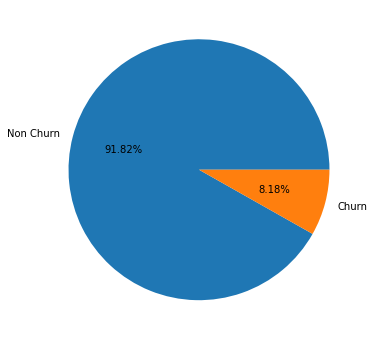

In [61]:
# Plotting pie chart for churn variable.
plt.figure(figsize=(8,6))
plt.pie(high_value_cust.churn.value_counts(),autopct='%1.2f%%',labels=["Non Churn","Churn"])
plt.show()

Approximately 8.1% of high value customers have churned.

#### Outlier treatment and Univariate analysis of numerical features :

In [62]:
# Checking quantiles of numerical columns.
high_value_cust[num_cols].quantile([0.1,0.2,0.4,0.5,0.7,0.9,0.95,0.99])

,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,ic_others_6,ic_others_7,ic_others_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
0.10,0.0000,0.1000,0.0000,2.9900,3.6900,0.000,0.0000,0.000,0.0000,0.0000,0.00,0.000,0.000,0.000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.000,0.0000,0.0,0.0,0.5500,0.8300,0.000,6.308,8.4400,1.940,0.000,0.0000,0.000,0.0000,0.0000,0.000,0.0000,0.000,0.0000,0.000,0.0000,0.00,0.000,0.0000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,289.0,0.0000,0.0000,0.0000,-392.40310,-231.7330,-308.5900,-16.1810,-31.7410,-178.6520,-390.1160,-0.0050,-9.2370,-552.4380,-137.9180,-41.1400,-5.6380,-0.130,-178.9170,-8.0,-506.10,-110.0,-1.5,-88.5,-149.50,-133.8560,-352.510
0.20,3.6100,3.9600,1.7400,16.3600,18.2720,9.860,0.0000,0.000,0.0000,0.0000,0.00,0.000,0.000,0.000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.000,0.0000,0.0,0.0,4.5800,5.2600,3.240,22.090,25.4400,17.702,0.000,0.0000,0.000,0.0000,0.0000,0.000,0.0000,0.000,0.0000,0.000,0.0000,0.00,0.000,0.0000,0.000,20.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,402.0,0.0000,0.0000,0.0000,-237.29040,-90.1070,-151.7630,-1.5300,-3.4590,-89.3390,-126.0270,0.0000,-4.0400,-263.4550,-70.0450,-18.6700,-0.1900,-0.025,-95.2960,-5.0,-323.00,-52.5,-0.5,-14.0,-76.00,-27.5640,-44.377
0.40,17.2800,17.6600,14.0800,56.6300,59.6440,48.360,0.0000,0.000,0.0000,0.0000,0.00,0.000,0.000,0.000,0.0000,7.6100,7.3600,3.410,0.0000,0.0000,0.000,0.0000,0.0,0.0,17.5300,18.4320,15.710,62.494,65.4320,58.430,0.660,0.8100,0.600,0.0000,0.0000,0.000,2.5900,2.660,1.6900,0.000,0.0000,0.00,0.000,0.0000,0.000,50.0,50.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,681.0,0.0000,0.0000,0.0000,-93.10590,-17.9600,-42.6830,0.0000,0.0000,-22.9370,-7.7090,0.0000,-0.3400,-66.4250,-18.5500,-3.7940,0.0000,0.000,-26.2750,-2.5,-130.00,0.0,0.0,0.0,0.00,0.0000,0.000
0.50,28.4100,28.5300,24.5400,87.6100,89.8900,78.030,0.2600,0.330,0.0500,0.0000,0.00,0.000,5.730,5.900,2.0800,23.6900,23.4900,14.460,0.0000,0.0000,0.000,0.0000,0.0,0.0,26.9100,27.8900,24.760,89.140,91.4900,84.630,2.010,2.2400,1.880,0.6400,0.7400,0.310,5.9300,6.180,4.5400,0.000,0.0000,0.00,0.000,0.0000,0.000,110.0,70.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,884.0,0.0000,0.0000,0.0000,-44.19900,-5.3800,-15.3700,0.0000,0.0000,-6.8550,-0.9150,0.0000,0.0000,-21.4350,-4.4350,-0.8700,0.0000,0.000,-6.

In [63]:
# Columns are showing steady increase till 0.95 percentile and after that there is huge difference, 
# Hence capping at 0.95 percentile.


for col in num_cols:
    quant = high_value_cust[col].quantile(0.95)
    high_value_cust[col] = high_value_cust[col].apply(lambda x : x if x <= quant else quant)

In [64]:
# Creating function for univariate analysis for numerical columns.

def univariate(var):
    print("\033[1m"+var+":"+"\033[0m")
    fig,axs=plt.subplots(1,2)
    fig.set_figheight(5)
    fig.set_figwidth(20)
    
    sns.distplot(high_value_cust[var],ax=axs[0])
    sns.boxplot(y=high_value_cust[var],x=high_value_cust['churn'],ax=axs[1])
    plt.show()

aon:


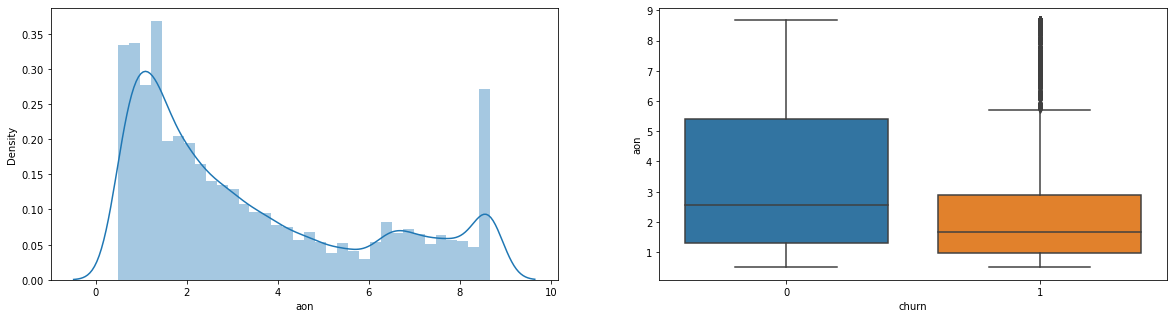

In [65]:
# Analysing aon column in terms of years.
print("\033[1m"+"aon"+":"+"\033[0m")
fig,axs=plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(20)

sns.distplot(high_value_cust["aon"]/365,ax=axs[0])
sns.boxplot(y=high_value_cust["aon"]/365,x=high_value_cust['churn'],ax=axs[1])
plt.show()

In [66]:
# Creating list of importanat numerical columns.
list_to_plot= ['arpu_diff','onnet_mou_diff','offnet_mou_diff','total_og_mou_diff','total_ic_mou_diff','total_rech_num_diff',
               'total_rech_amt_diff','max_rech_amt_diff','total_rech_data_diff','max_rech_data_diff','av_rech_amt_data_diff',
               'vol_2g_mb_diff','vol_3g_mb_diff','vbc_3g_6','vbc_3g_7','vbc_3g_8']

arpu_diff:


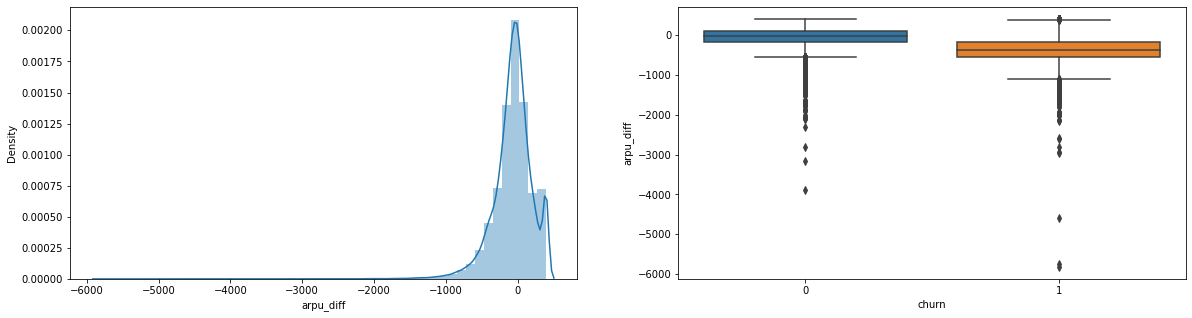

onnet_mou_diff:


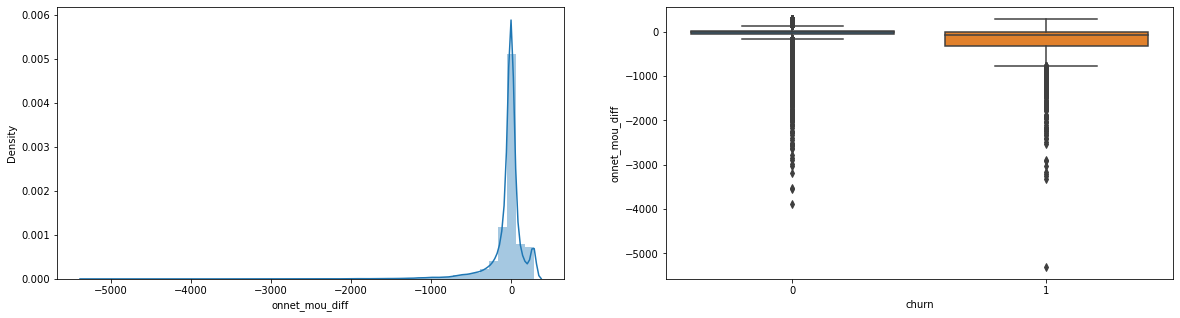

offnet_mou_diff:


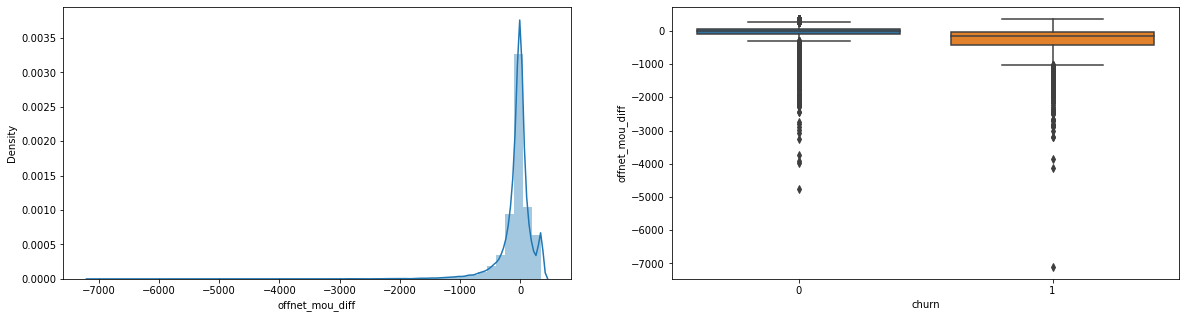

total_og_mou_diff:


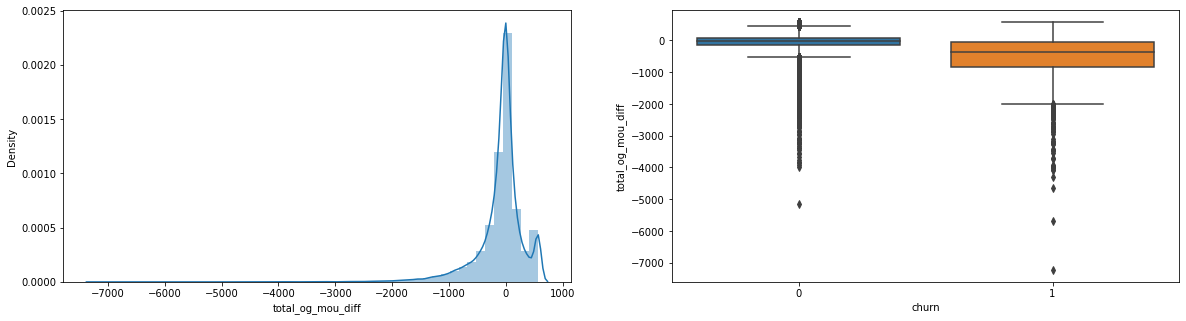

total_ic_mou_diff:


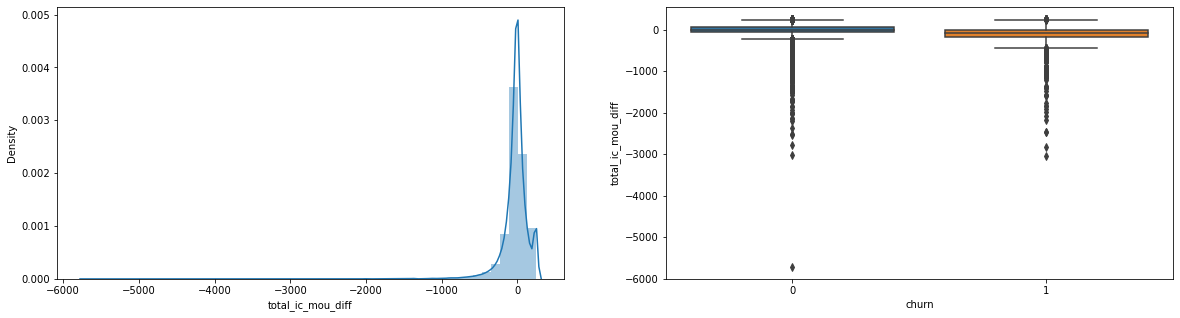

total_rech_num_diff:


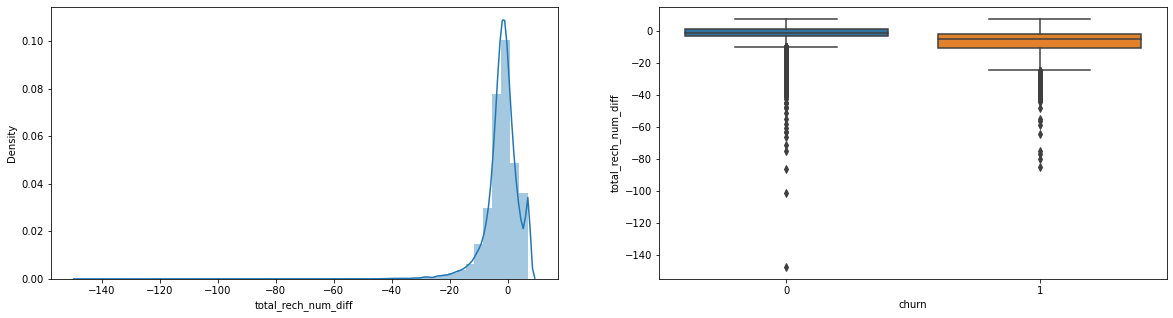

total_rech_amt_diff:


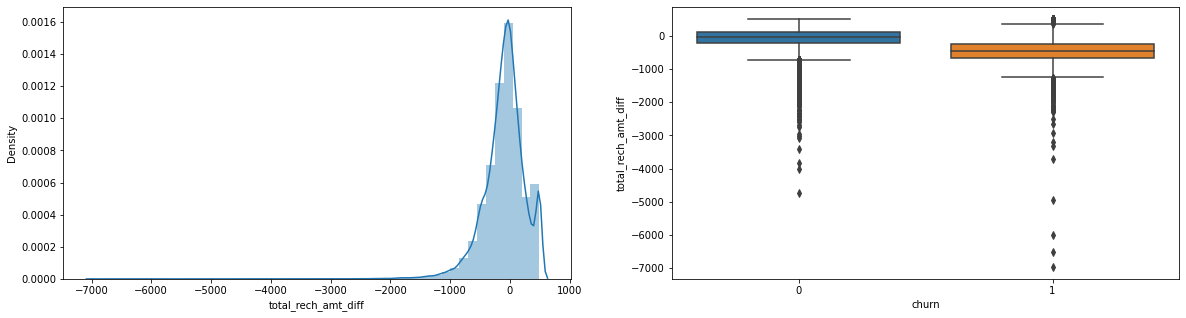

max_rech_amt_diff:


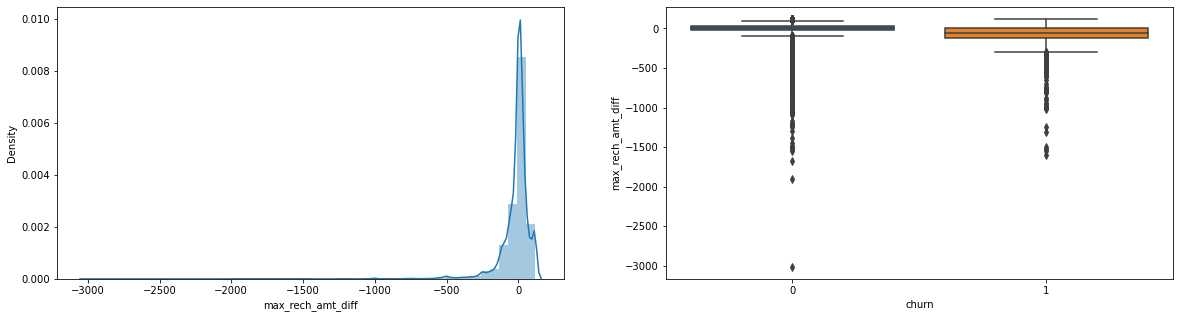

total_rech_data_diff:


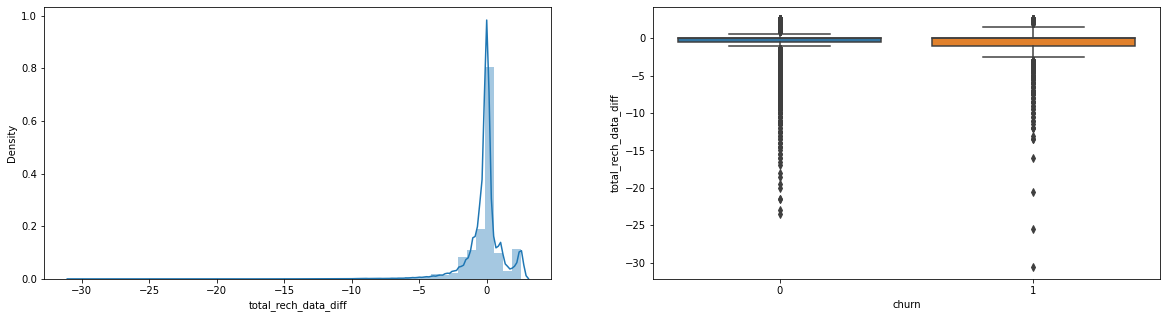

max_rech_data_diff:


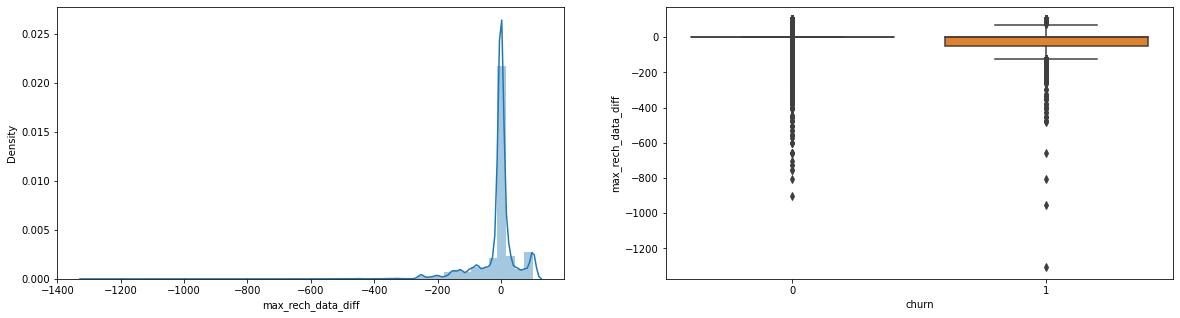

av_rech_amt_data_diff:


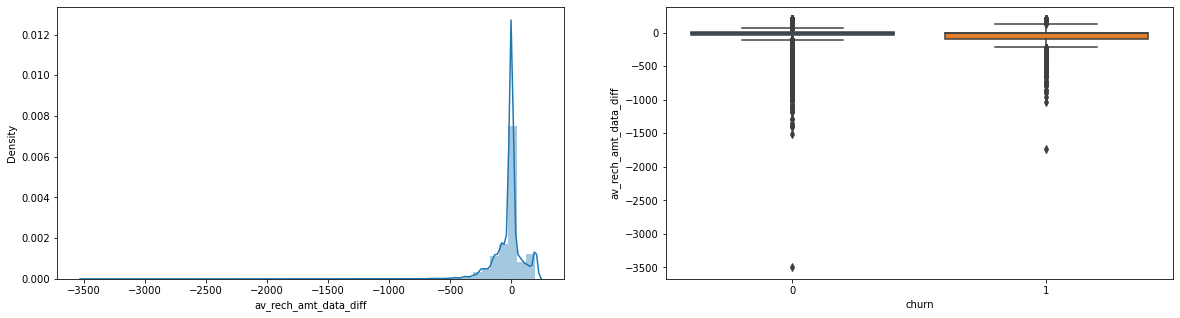

vol_2g_mb_diff:


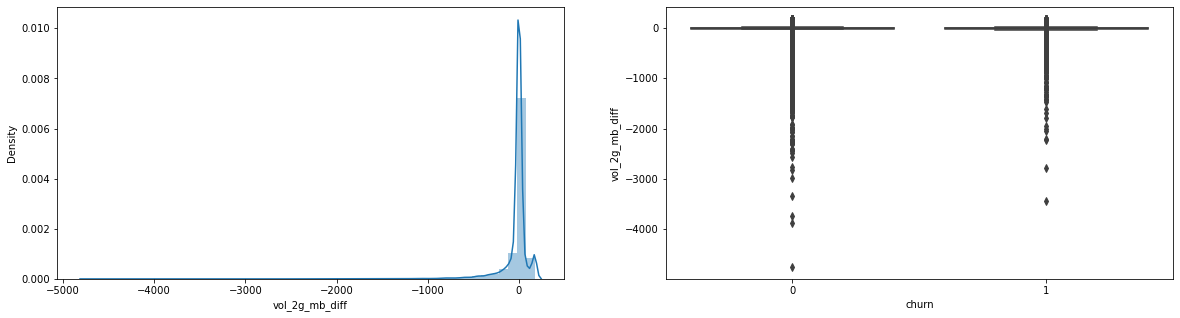

vol_3g_mb_diff:


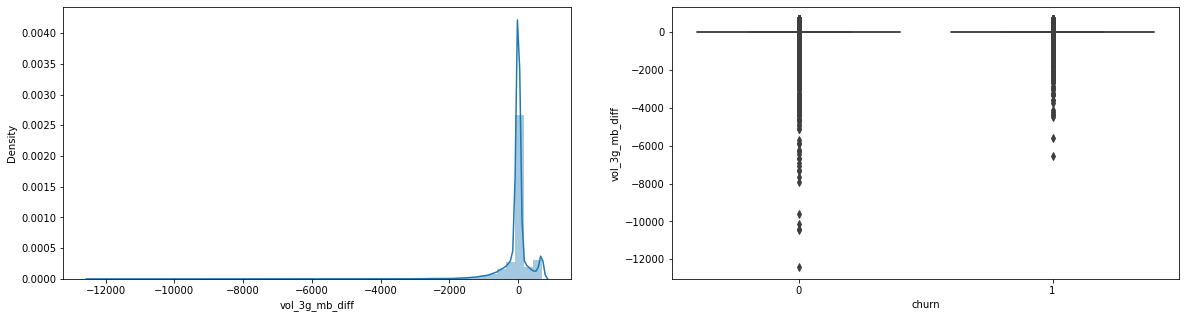

vbc_3g_6:


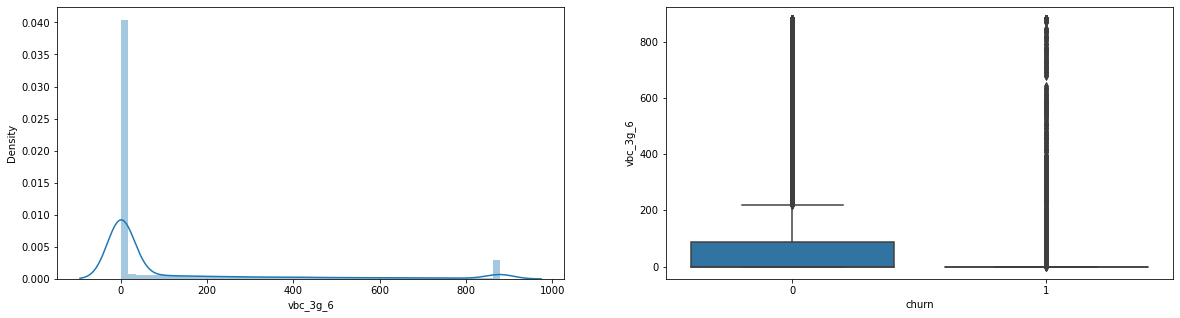

vbc_3g_7:


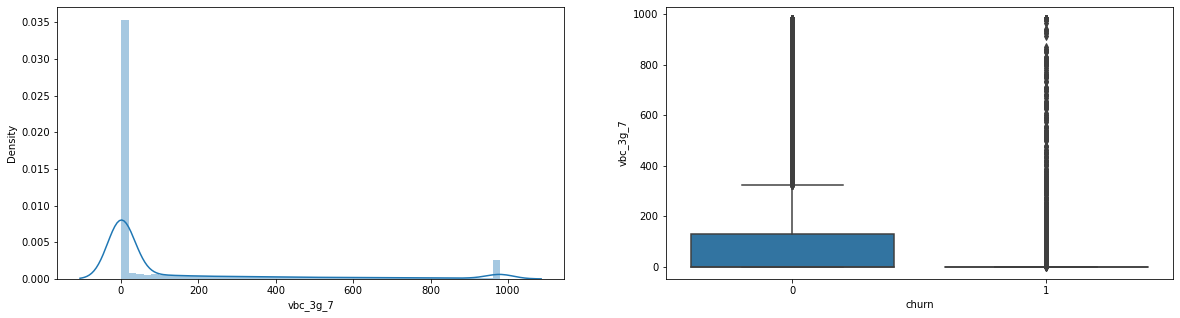

vbc_3g_8:


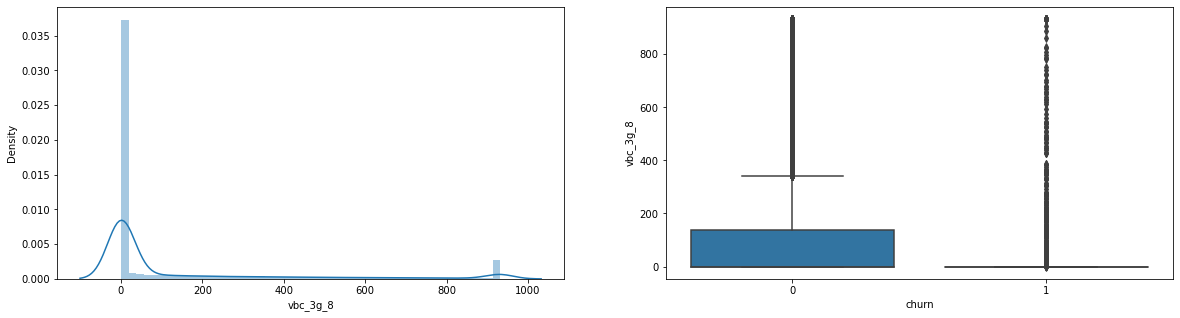

In [67]:
# Plotting numerical columns
for i in list_to_plot:
    univariate(i)

#### Univariate analysis for categorical features:

In [68]:
# Checking value count of categorical columns.
for col in cat_cols:
    print("\033[1m"+col+":"+"\033[0m")
    print((high_value_cust[col].value_counts(normalize=True,dropna=False))*100)
    print()

night_pck_user_6:
0.0    98.858059
1.0    1.141941 
Name: night_pck_user_6, dtype: float64

night_pck_user_7:
0.0    98.944873
1.0    1.055127 
Name: night_pck_user_7, dtype: float64

night_pck_user_8:
0.0    99.018331
1.0    0.981669 
Name: night_pck_user_8, dtype: float64

fb_user_6:
0.0    54.302314
1.0    45.697686
Name: fb_user_6, dtype: float64

fb_user_7:
0.0    53.784767
1.0    46.215233
Name: fb_user_7, dtype: float64

fb_user_8:
0.0    57.544492
1.0    42.455508
Name: fb_user_8, dtype: float64

churn:
0    91.816087
1    8.183913 
Name: churn, dtype: float64



In [69]:
# Some of the variables have more than 95% imbalance, dropping those columns.

drop_list = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8']

# Dropping the columns
high_value_cust = high_value_cust.drop(drop_list,axis = 1)

fb_user_6:


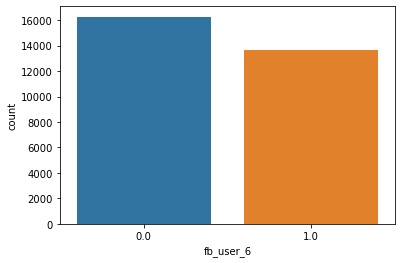

fb_user_7:


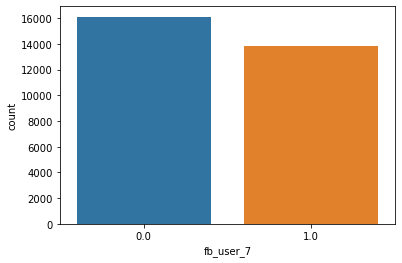

fb_user_8:


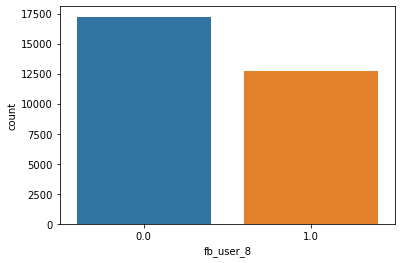

churn:


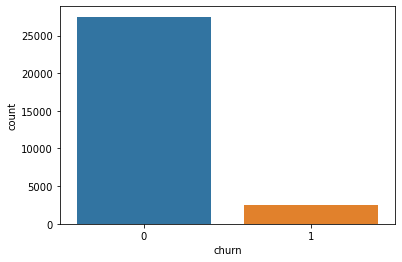

In [70]:
# updating cat cols list
cat_cols = [col for col in cat_cols if col not in drop_list]

# Plotting count plot for categorical columns.
for col in cat_cols:
    print("\033[1m"+col+":"+"\033[0m")
    sns.countplot(high_value_cust[col])
    plt.xticks(rotation = 0)
    plt.show()

count_rech_2g_6:


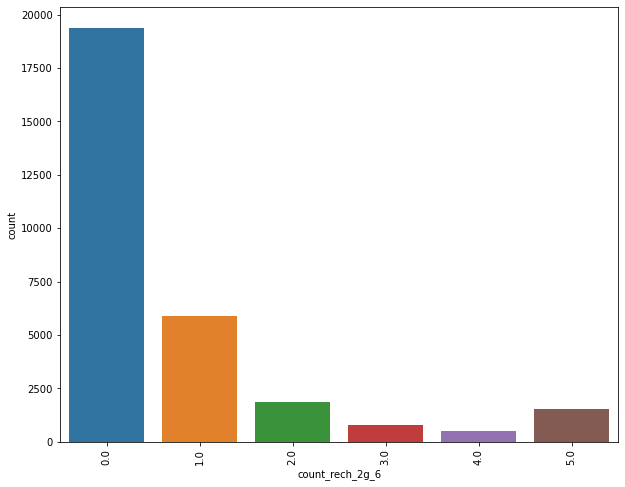

count_rech_2g_7:


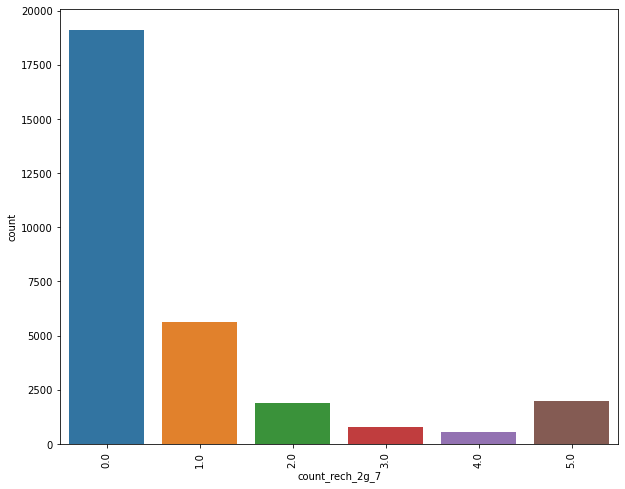

count_rech_2g_8:


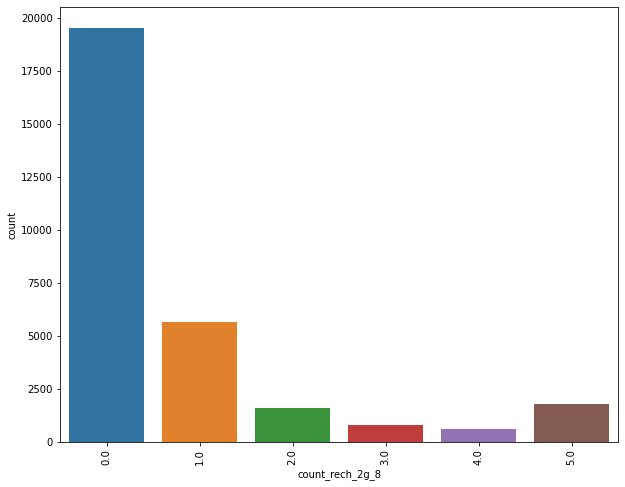

count_rech_3g_6:


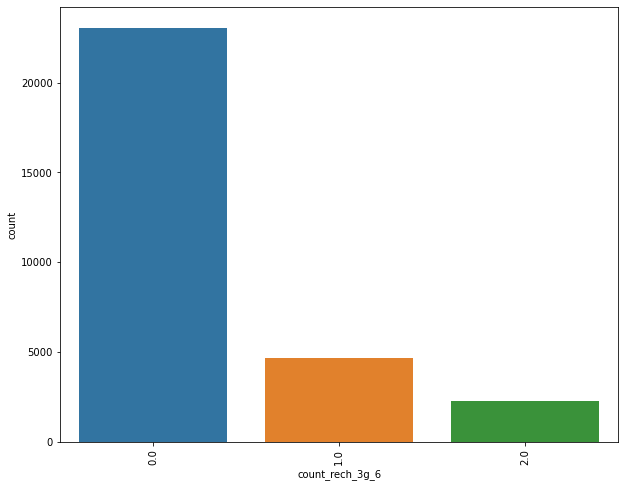

count_rech_3g_7:


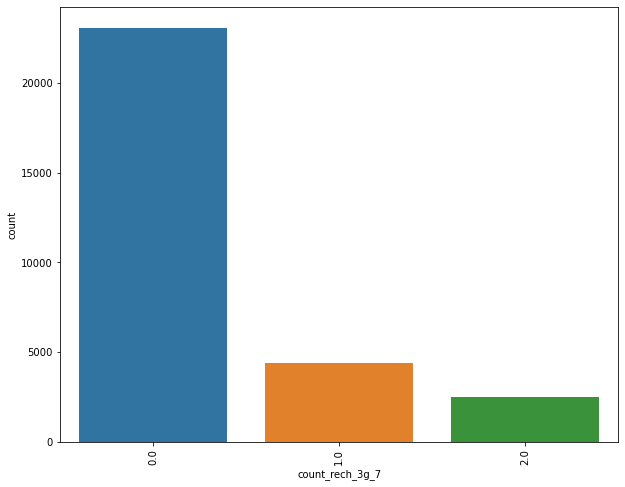

count_rech_3g_8:


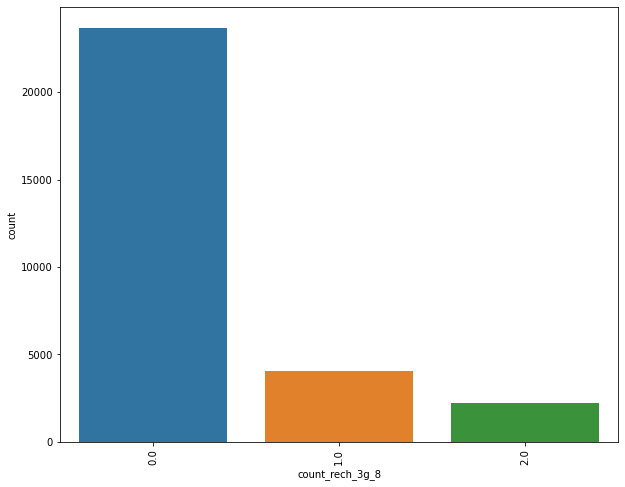

monthly_2g_6:


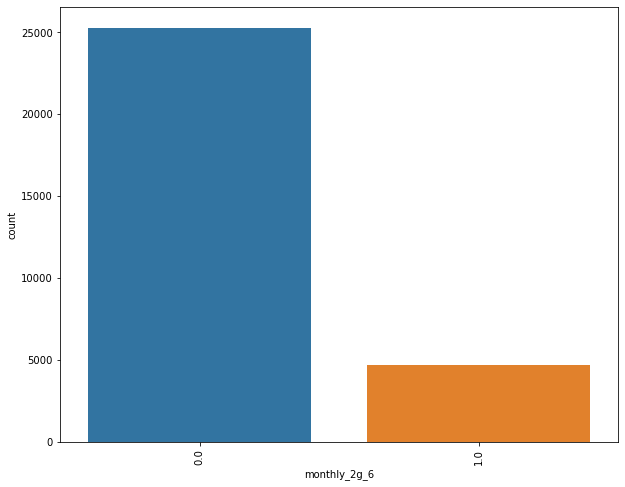

monthly_2g_7:


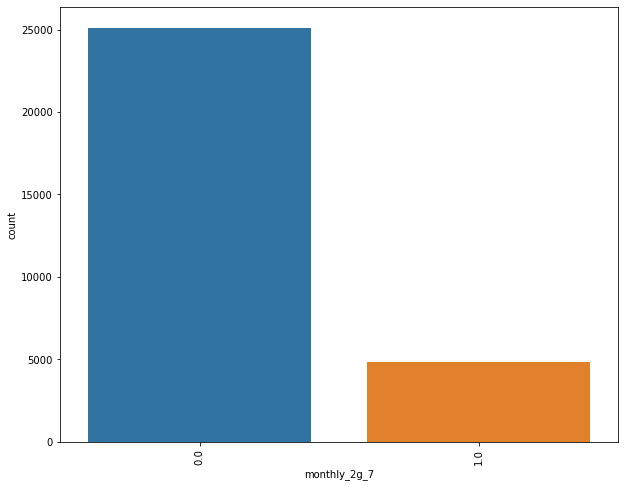

monthly_2g_8:


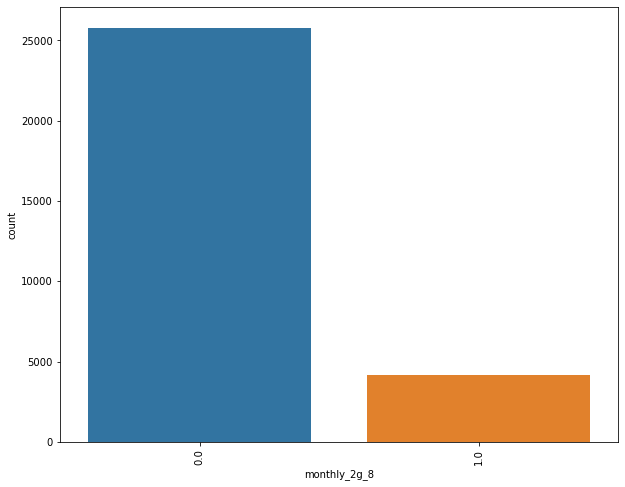

sachet_2g_6:


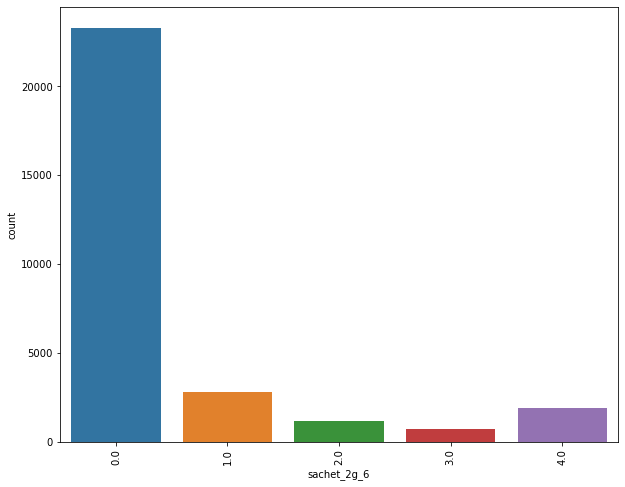

sachet_2g_7:


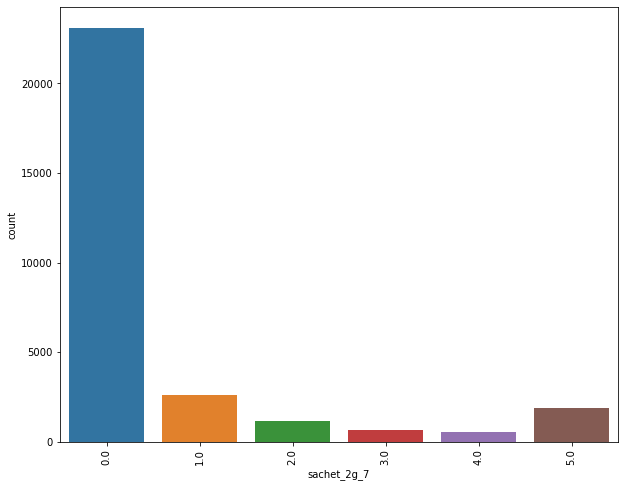

sachet_2g_8:


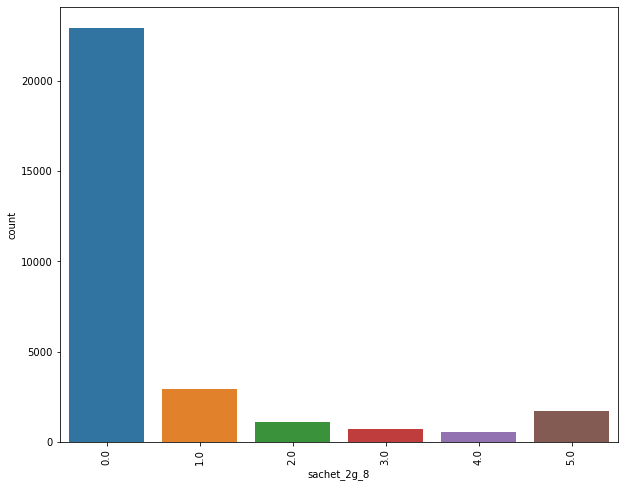

monthly_3g_6:


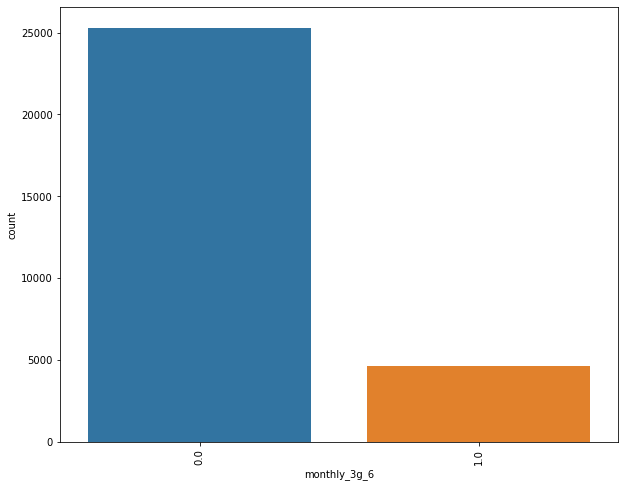

monthly_3g_7:


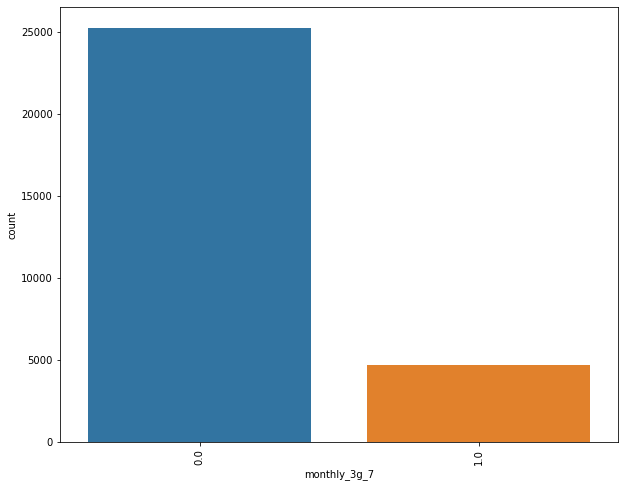

monthly_3g_8:


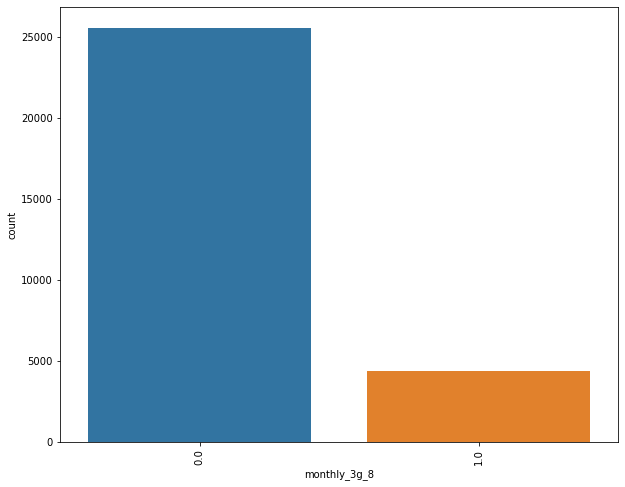

sachet_3g_6:


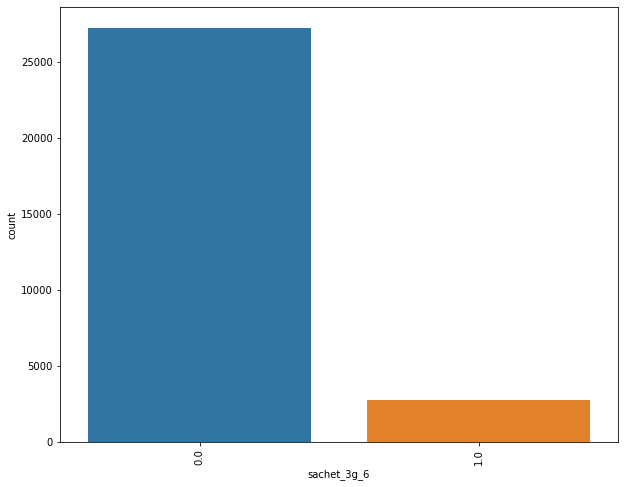

sachet_3g_7:


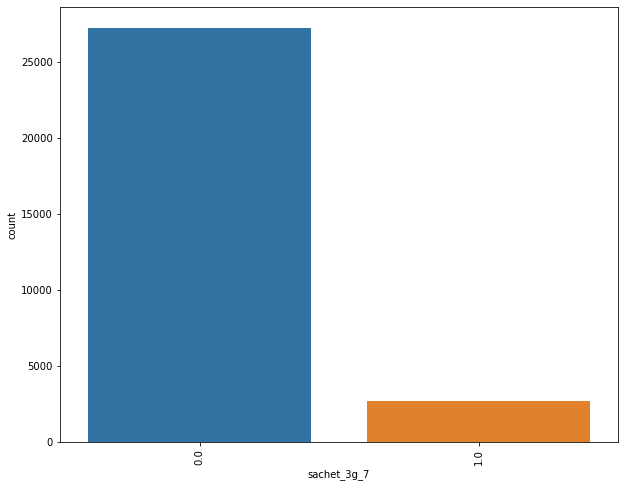

sachet_3g_8:


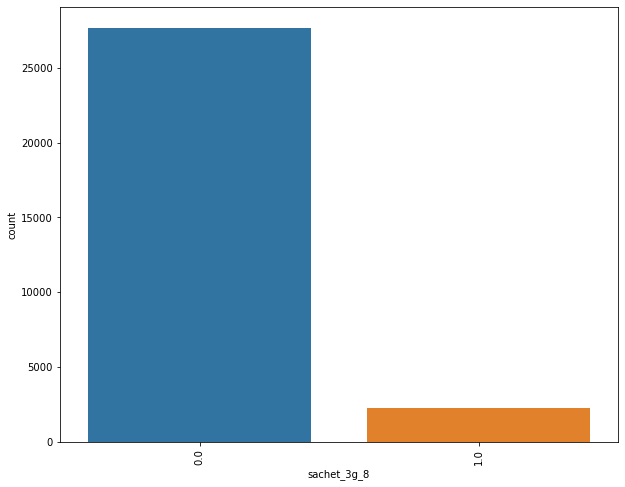

In [72]:
# Plotting count plot for columns containing counts.
count_cols = ["count_rech_2g_6","count_rech_2g_7","count_rech_2g_8","count_rech_3g_6","count_rech_3g_7","count_rech_3g_8",
              "monthly_2g_6","monthly_2g_7","monthly_2g_8","sachet_2g_6","sachet_2g_7","sachet_2g_8","monthly_3g_6",
              "monthly_3g_7","monthly_3g_8","sachet_3g_6","sachet_3g_7","sachet_3g_8"]

for col in count_cols:
    print("\033[1m"+col+":"+"\033[0m")
    plt.figure(figsize=[10,8])
    sns.countplot(high_value_cust[col])
    plt.xticks(rotation = 90)
    plt.show()

#### Bivariate analysis:

fb_user_6:


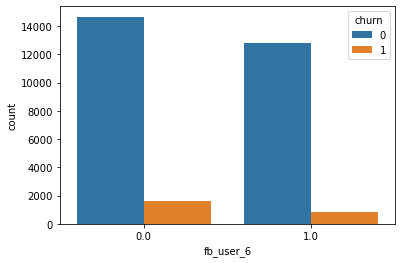


fb_user_7:


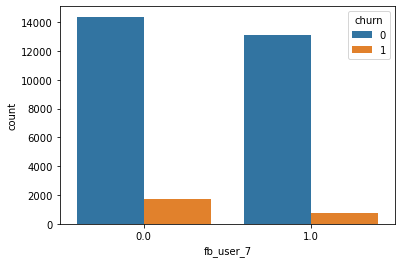


fb_user_8:


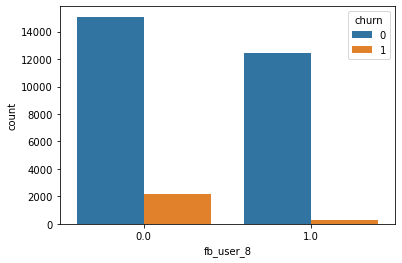

In [73]:
# Plotting cat cols with churn
for col in cat_cols:
    if col != 'churn':
        print("\033[1m"+col+":"+"\033[0m")
        sns.countplot(high_value_cust[col],hue=high_value_cust['churn'])
        plt.xticks(rotation = 0)
        plt.show()
        print()

count_rech_2g_6:


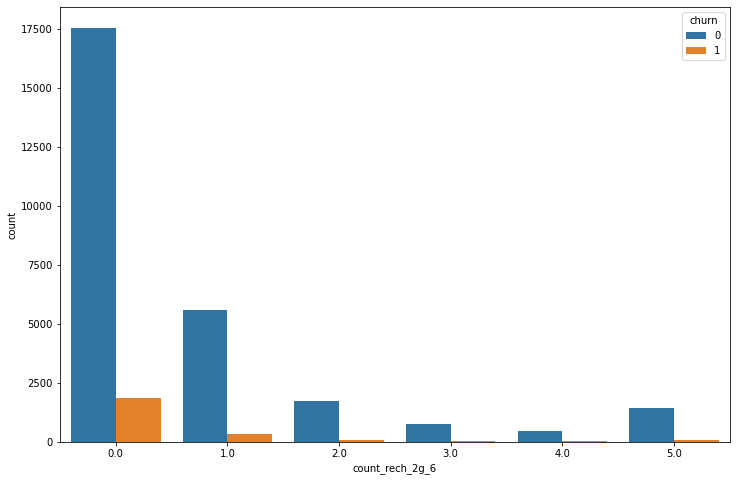


count_rech_2g_7:


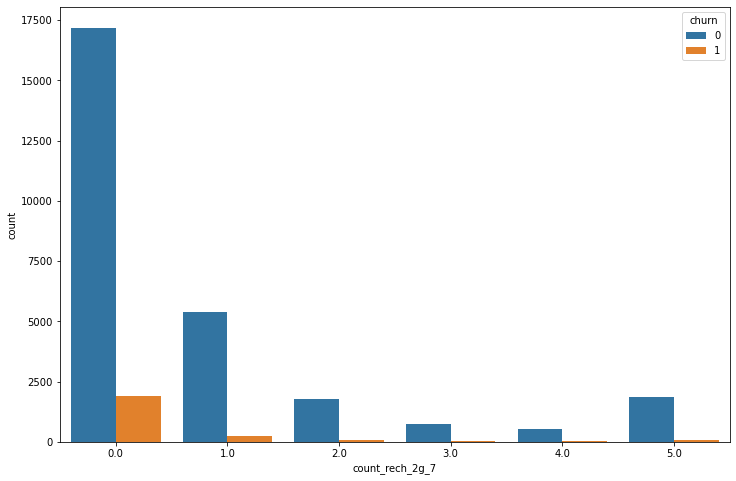


count_rech_2g_8:


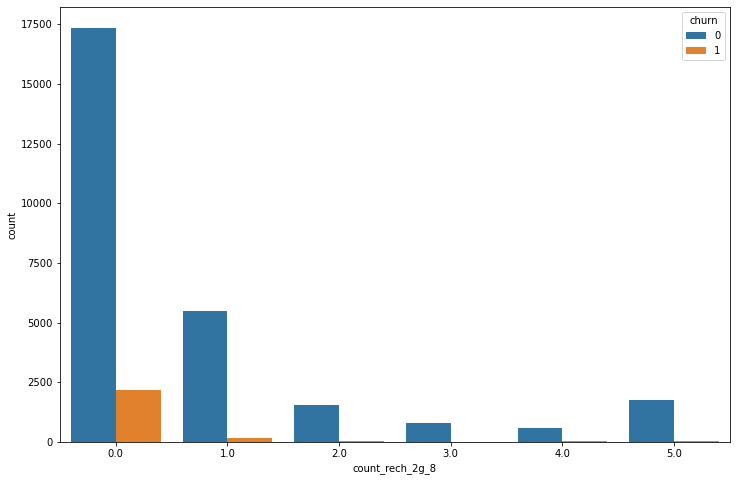


count_rech_3g_6:


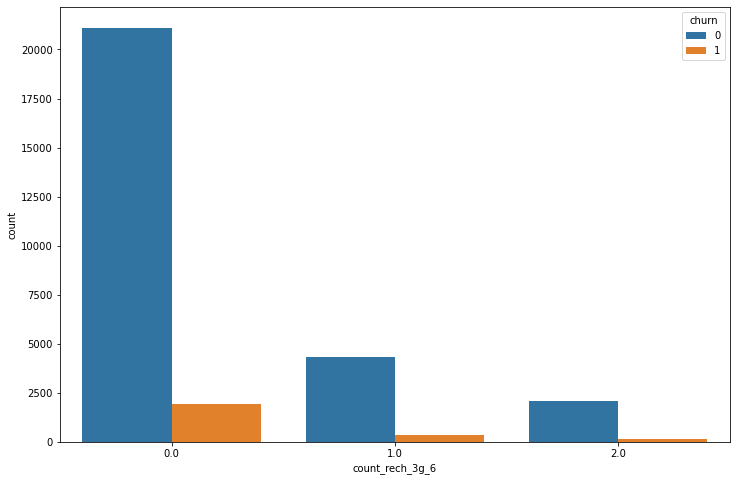


count_rech_3g_7:


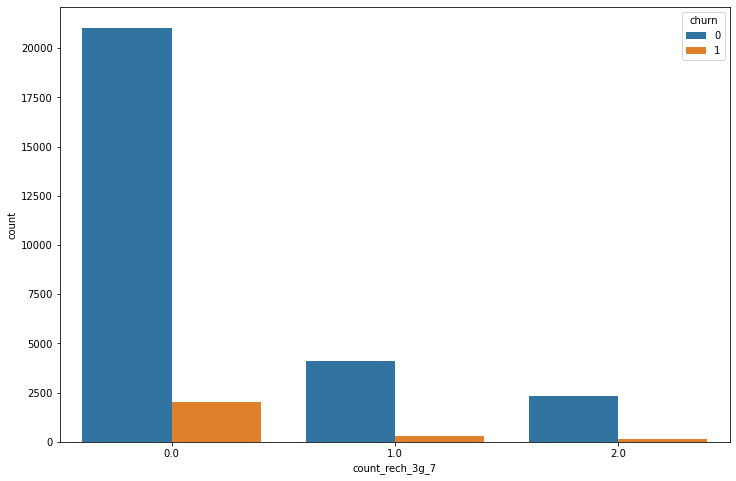


count_rech_3g_8:


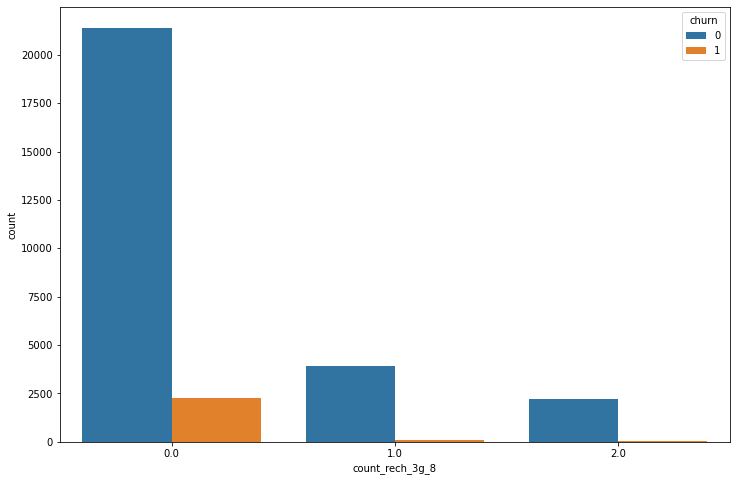


monthly_2g_6:


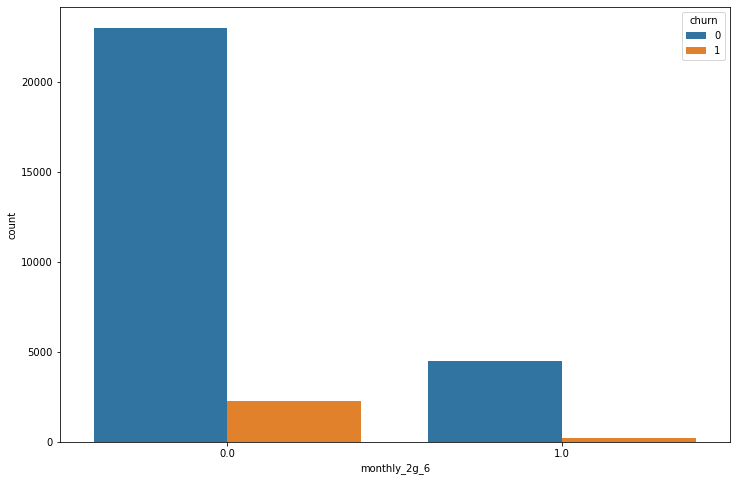


monthly_2g_7:


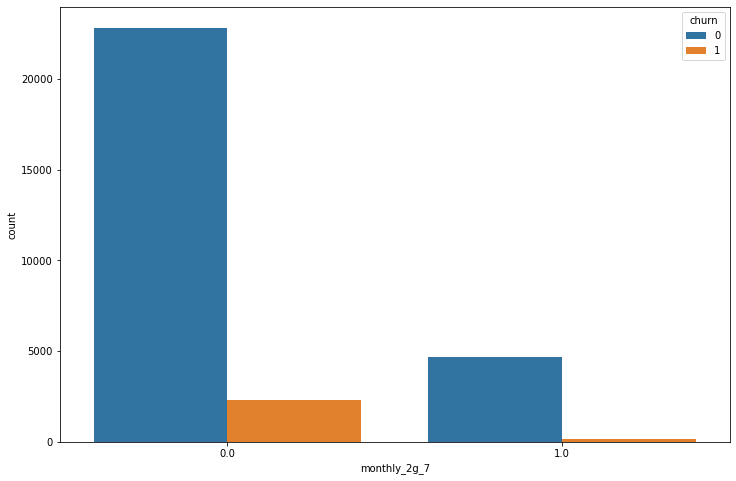


monthly_2g_8:


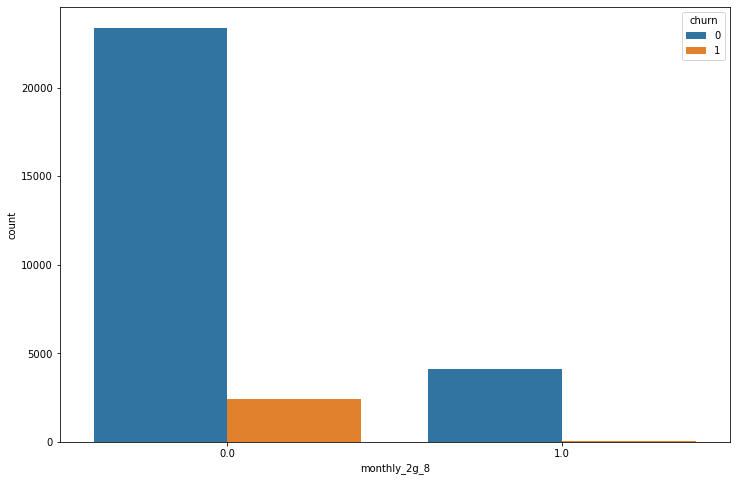


sachet_2g_6:


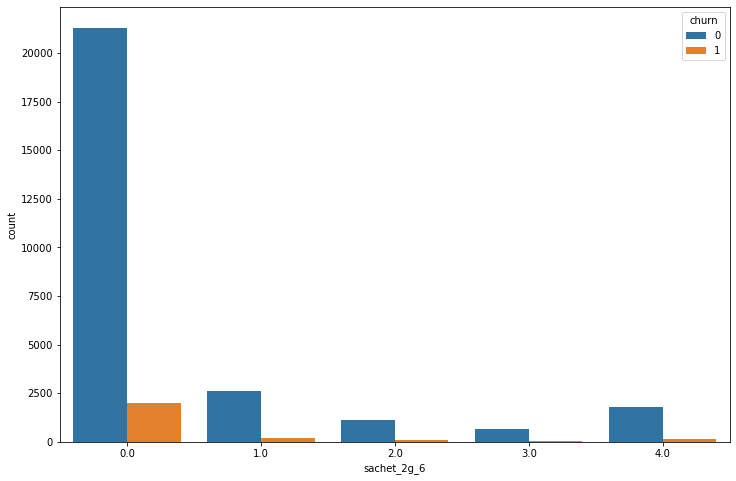


sachet_2g_7:


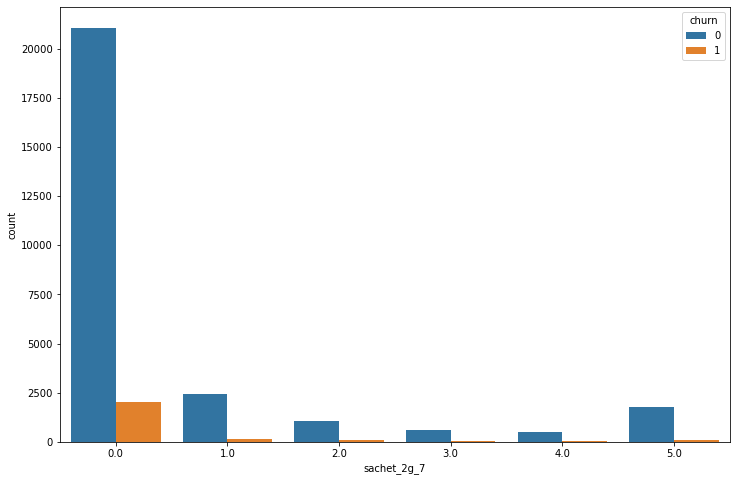


sachet_2g_8:


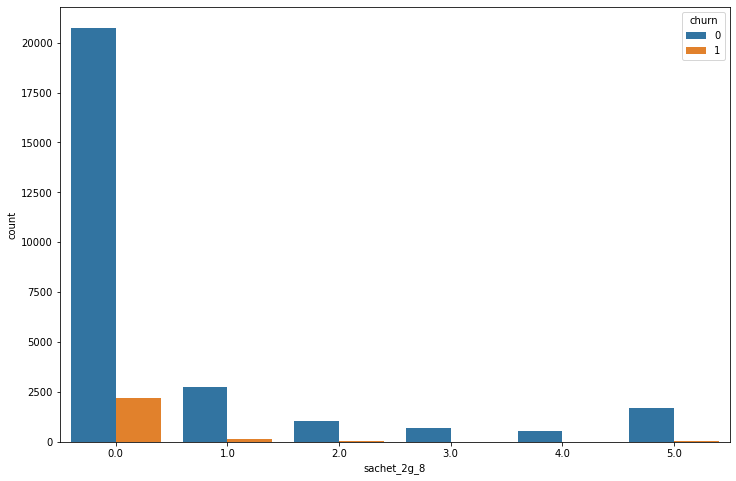


monthly_3g_6:


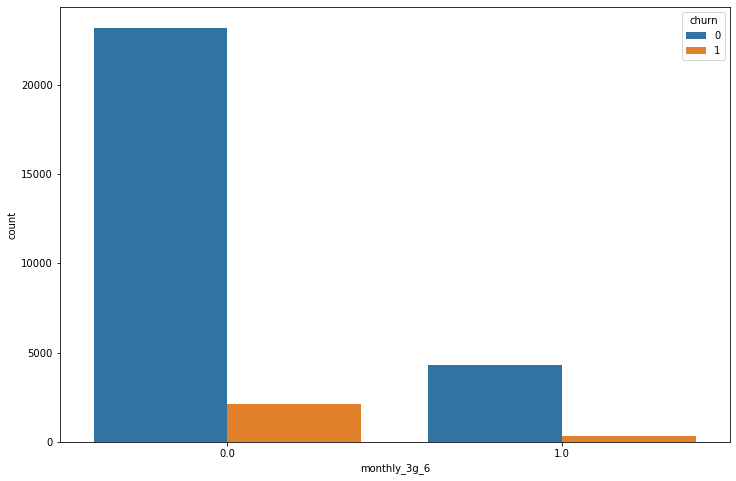


monthly_3g_7:


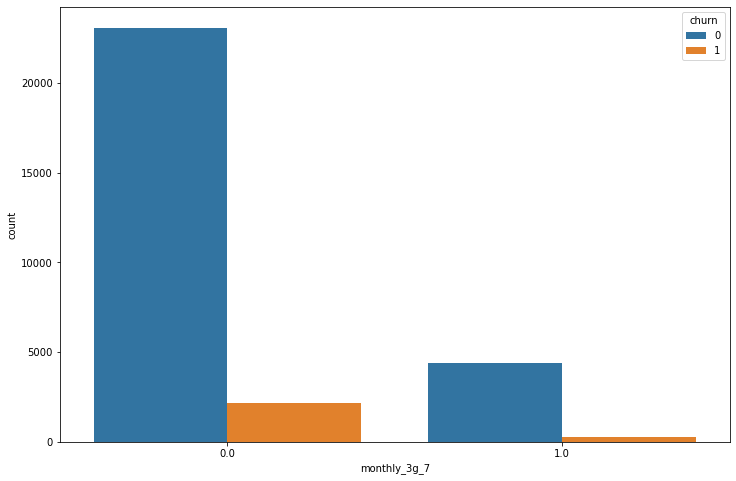


monthly_3g_8:


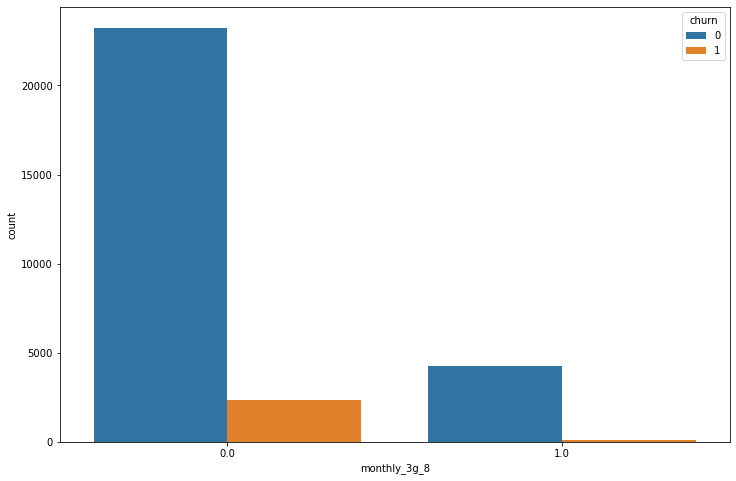


sachet_3g_6:


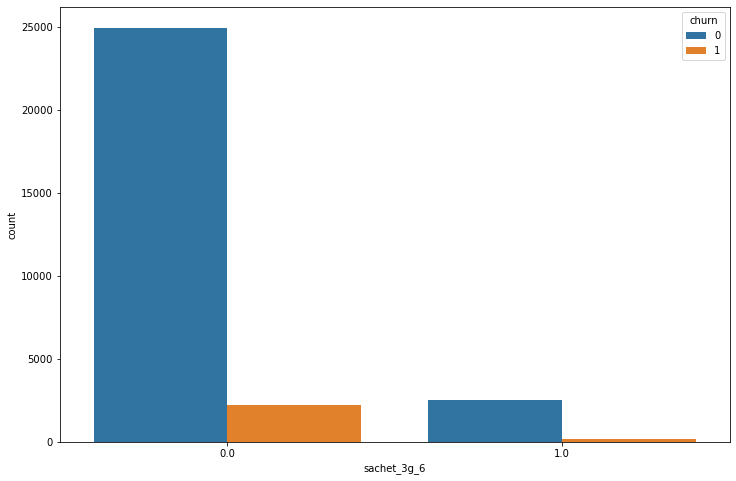


sachet_3g_7:


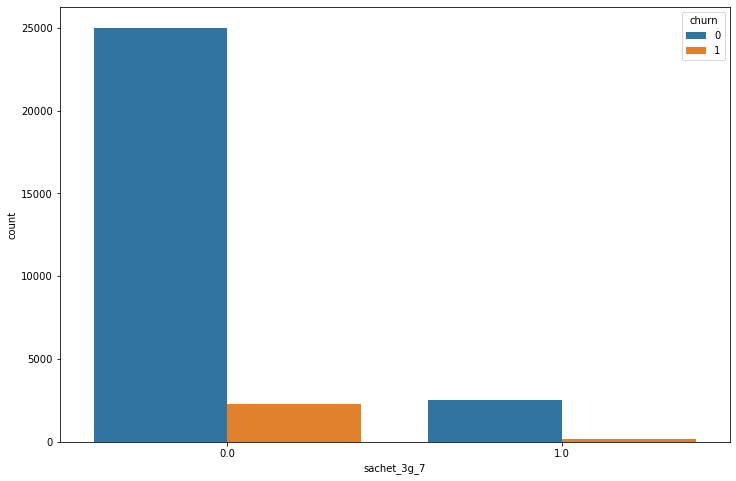


sachet_3g_8:


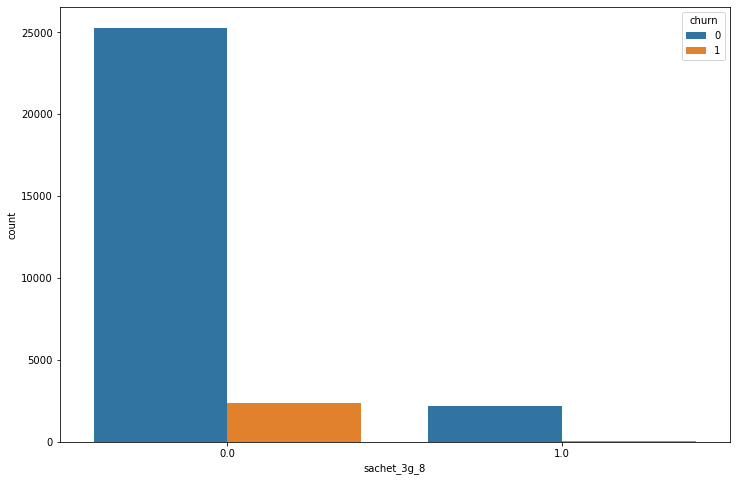

In [74]:
# Plotting count columns with churn
for col in count_cols:
    print("\033[1m"+col+":"+"\033[0m")
    plt.figure(figsize=[12,8])
    sns.countplot(high_value_cust[col],hue=high_value_cust['churn'])
    plt.xticks(rotation = 0)
    plt.show()
    print()

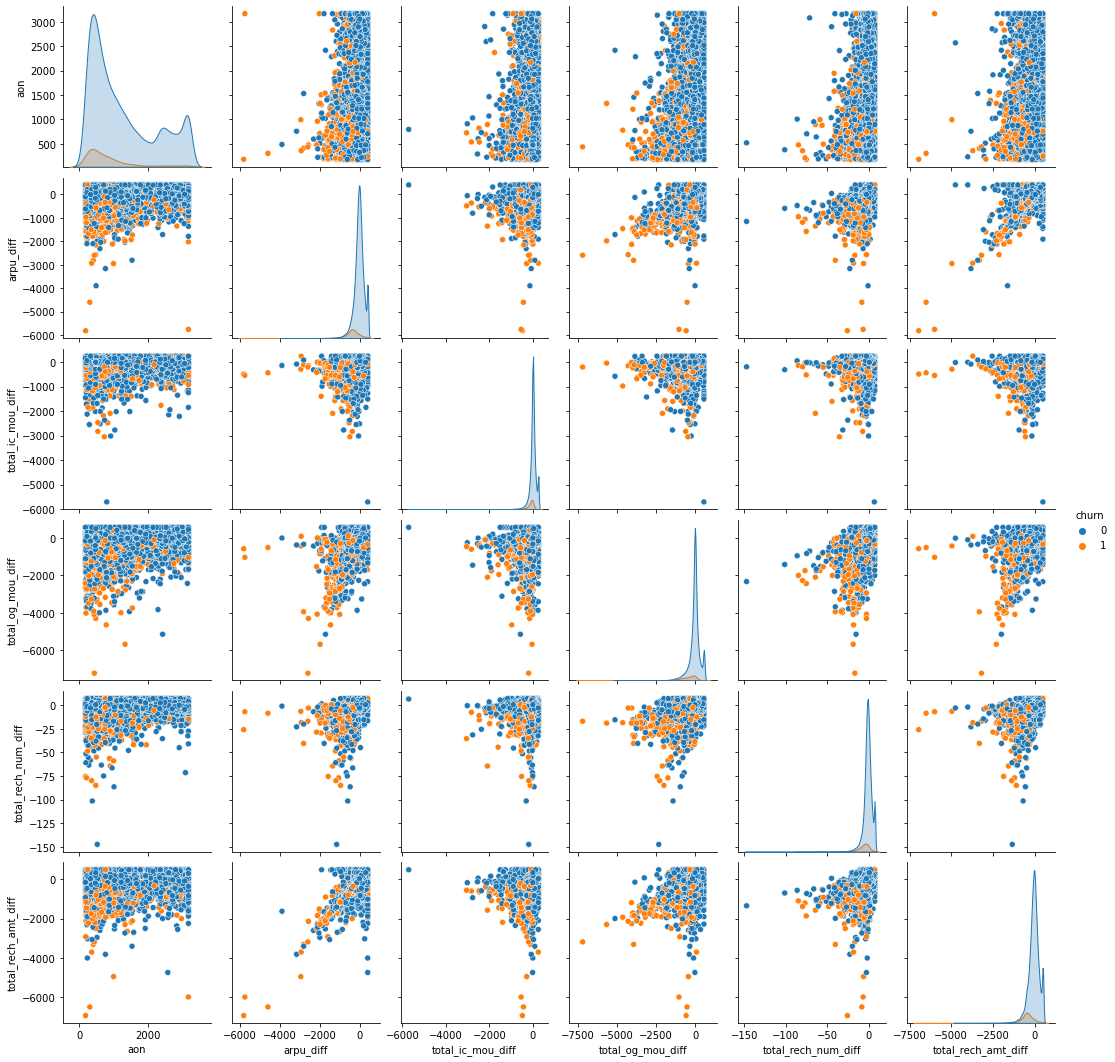

In [75]:
# Plotting aon vs arpu_diff, total_ic_mou_diff, total_og_mou_diff, total_rech_num_diff, total_rech_amt_diff

sns.pairplot(data = high_value_cust , vars=["aon","arpu_diff","total_ic_mou_diff", "total_og_mou_diff", "total_rech_num_diff", "total_rech_amt_diff"],hue="churn")
plt.show()

In [76]:
# Plotting correlation matrix between numerical variables and extracting those with corr value greater than 0.8.

res = high_value_cust.corr().abs().unstack().sort_values(ascending=False)
res[(res != 1)& (res>=0.8)].dropna().iloc[1::2]

sachet_2g_8          count_rech_2g_8      0.956612
count_rech_2g_7      sachet_2g_7          0.949952
arpu_3g_7            arpu_2g_7            0.944604
arpu_3g_8            arpu_2g_8            0.942674
arpu_2g_6            arpu_3g_6            0.941840
sachet_2g_6          count_rech_2g_6      0.939119
std_og_mou_diff      total_og_mou_diff    0.894162
count_rech_3g_8      arpu_2g_8            0.865236
arpu_2g_8            monthly_3g_8         0.863347
total_ic_mou_diff    loc_ic_mou_diff      0.861343
count_rech_3g_8      arpu_3g_8            0.859102
count_rech_3g_6      arpu_2g_6            0.858331
                     arpu_3g_6            0.857185
arpu_3g_7            count_rech_3g_7      0.855646
count_rech_3g_7      arpu_2g_7            0.855584
monthly_3g_8         arpu_3g_8            0.854448
monthly_3g_6         arpu_2g_6            0.853690
total_rech_amt_diff  arpu_diff            0.852255
monthly_3g_6         arpu_3g_6            0.851522
arpu_3g_7            monthly_3g

In [77]:
# lots of variables have high correlation values, but not dropping them at this point as pca do not need this processing step.

**Observations:**

1. It is observed that there are more number of people having age on network less than 2 years. And people having less age tend to churn more.

2. arpu_diff, total_ic_mou_diff total_og_mou_diff, total_rech_num_diff, total_rech_amt_diff shows that there is a dip in arpu, total_ic_mou, total_og_mou, total_rech_num, total_rech_amt for churners in 8th month compared to 6th and 7th months

## Modelling:

### Train-Test_split:

In [78]:
# Splitting the data into train and test sets with 70:30 ratio.
y = high_value_cust["churn"]
X = high_value_cust.drop("churn",axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state=42)

In [79]:
# Checking percentage of churn class in train data.
print(y_train.value_counts())
y_train.value_counts(normalize = True).reset_index()

0    19248
1    1716 
Name: churn, dtype: int64


,index,churn
0,0,0.918145
1,1,0.081855


In [80]:
# Checking percentage of churn class in test data.
print(y_test.value_counts())
y_test.value_counts(normalize = True).reset_index()

0    8250
1    735 
Name: churn, dtype: int64


,index,churn
0,0,0.918197
1,1,0.081803


### SMOTE to handle imbalanced data:

In [81]:
# Applying smote on the data set.
smt = SMOTE(random_state=45, k_neighbors=5)
X_train_resampled, y_train_resampled = smt.fit_resample(X_train, y_train)
len(X_train_resampled)

38496

In [82]:
# Checking class count of y.
y_train_resampled.value_counts()

0    19248
1    19248
Name: churn, dtype: int64

### Scaling the data:

In [83]:
# Instantializing scalar.
scaler = StandardScaler()

In [84]:
# Applying scaler to all numerical variables.
X_train_resampled[num_cols]=scaler.fit_transform(X_train_resampled[num_cols])

In [85]:
# Checking head
X_train_resampled.head()

,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,ic_others_6,ic_others_7,ic_others_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
0,1.001436,1.037698,0.371797,-0.609718,-0.664722,-0.584399,0.650664,-0.211357,0.215465,-0.446138,3.598811,-0.379485,-0.601364,-0.564968,-0.432174,-0.669678,-0.619145,-0.480558,-0.318087,-0.313026,-0.270653,-0.488621,0.0,0.0,3.173285,1.301823,0.108031,-0.821409,-0.603240,-0.610693,-0.313049,0.517205,0.245209,-0.592436,-0.565462,-0.442477,-0.681860,-0.638932,-0.503265,3.316420,-0.370643,-0.310196,-0.406858,-0.371829,3.826492,0.944251,1.052636,2.552821,0.307800,0.280021,-0.444009,-0.49979,-0.471254,-0.380058,-0.460645,-0.435006,-0.364630,-0.442541,1.778885,-0.376178,2.861812,2.879119,-0.306148,-0.454874,-0.433993,-0.375146,-0.420254,-0.396703,-0.328409,-0.329336,-0.308418,-0.238357,1.0,1.0,0.0,0.864302,-0.388091,-0.429427,-0.436605,0.169923,0.188577,0.370923,0.156762,0.168989,-0.101070,0.451585,0.096023,-0.449661,0.345949,-0.554972,0.187454,0.127392,0.231937,-0.355611,0.223275,0.062231,0.972584,-0.426390,-1.928973,-1.018186,-0.825556,0.199906
1,-0.211158,-0.018959,-0.102092,-0.812429,-0.782182,-0.637149,1.828743,0.195040,0.125906,-0.446138,-0.454157,0.026896,-0.539890,-0.469605,-0.352758,0.046058,0.271055,0.772575,-0.318087,-0.313026,-0.270653,-0.488621,0.0,0.0,-0.116146,-0.198213,-0.004956,-0.886782,-0.853807,-0.683077,-0.521094,-0.505281,-0.449836,-0.453274,0.667530,2.988357,0.138596,0.945969,1.616518,-0.375339,-0.370643,-0.310196,-0.406858,-0.371829,-0.318677,0.320674,0.694215,1.226605,-0.530118,-0.524332,-0.444009,-0.49979,1.339323,-0.380058,-0.460645,-0.435006,-0.364630,-0.485844,-0.454032,-0.376178,-0.377587,-0.371971,-0.306148,-0.454874,-0.433993,-0.375146,-0.420254,2.682443,-0.328409,-0.329336,-0.308418,-0.238357,0.0,0.0,0.0,0.017580,-0.388091,-0.429427,-0.436605,1.048666,0.328555,0.478592,0.156762,0.168989,0.233782,0.484642,0.096023,0.250186,0.504066,0.311117,0.925909,0.127515,0.231937,0.612057,0.361211,0.838484,0.632136,-0.087625,-0.978664,-0.460458,0.236278,0.199906
2,-0.613605,-0.423374,-0.371573,-0.638695,-0.761846,-0.462640,-0.396817,-0.110100,-0.414485,-0.446138,-0.454157,-0.379485,2.577279,0.709093,3.706666,0.008827,2.577638,3.474209,-0.318087,-0.313026,-0.270653,-0.488621,0.0,0.0,-0.500186,-0.181322,0.054739,-0.039682,-0.252869,-0.369440,-0.414997,0.114372,-0.415620,-0.519776,-0.555391,-0.362480,-0.270501,-0.416466,-0.127583,-0.375339,-0.370643,-0.310196,-0.406858,-0.371829,-0.318677,0.320674,0.446077,-0.762719,-0.530118,-0.524332,-0.444009,-0.49979,-0.471254,-0.380058,-0.460645,-0.435006,-0.36

In [86]:
# Applying scaler to all numerical variables of test data.
X_test[num_cols]=scaler.transform(X_test[num_cols])

In [87]:
# Checking head
X_test.head()

,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,ic_others_6,ic_others_7,ic_others_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
97995,-0.582706,-0.510081,-0.455893,0.182083,-0.016081,-0.052565,-0.488371,-0.472709,-0.414485,-0.446138,-0.454157,-0.379485,-0.601364,-0.566992,-0.432174,-0.669678,-0.619145,-0.480558,-0.318087,-0.313026,-0.192888,0.153283,0.0,0.0,0.266699,-0.404808,-0.375929,-0.378720,-0.360615,-0.517100,-0.307122,-0.505281,-0.449836,-0.592436,-0.565462,-0.442477,-0.681860,-0.638932,-0.503265,-0.375339,-0.370643,-0.310196,-0.406858,-0.371829,-0.318677,-0.529657,1.025065,1.253129,0.307800,1.084373,0.451660,1.26823,3.149900,1.642307,0.225003,0.924042,0.415906,0.176756,0.922521,0.472601,-0.377587,-0.371971,-0.306148,0.530480,1.216679,0.545525,-0.420254,-0.396703,-0.328409,3.445020,3.630838,4.472612,1.0,1.0,1.0,-0.997088,1.103286,0.875308,1.348799,0.171835,0.371893,0.306116,0.156762,0.168989,0.049164,0.452340,0.096023,0.213583,0.411832,-0.116031,0.249002,0.117528,0.231937,0.004336,0.223275,0.326086,0.380852,-0.42639,0.305341,-1.001156,0.221421,-0.226839
72102,0.324019,-0.275714,-0.145617,1.319059,1.616150,1.715174,0.024599,0.247037,0.535753,-0.446138,-0.454157,-0.379485,-0.487267,-0.488941,-0.257378,-0.157865,-0.049111,0.536939,-0.318087,-0.313026,-0.270653,-0.488621,0.0,0.0,-0.622226,-0.665274,-0.450312,-0.467760,-0.596004,-0.497658,0.007021,-0.057108,0.095600,1.186496,-0.169570,1.496329,-0.681860,-0.638932,-0.270592,-0.375339,0.082146,-0.310196,-0.406858,-0.371829,-0.318677,0.320674,0.446077,0.961362,-0.530118,-0.524332,-0.444009,-0.49979,-0.471254,-0.380058,-0.460645,-0.435006,-0.364630,-0.485844,-0.454032,-0.376178,-0.377587,-0.371971,-0.306148,-0.454874,-0.433993,-0.375146,-0.420254,-0.396703,-0.328409,-0.329336,-0.308418,-0.238357,0.0,0.0,0.0,2.459779,-0.388091,-0.429427,-0.436605,0.259730,0.266005,0.382377,-0.223804,-0.833143,0.119551,0.568452,0.096023,0.187229,0.538579,0.210572,0.420558,0.141324,0.231937,0.338698,0.706052,0.585230,0.859101,0.25114,0.305341,0.293113,0.236278,0.199906
93057,-0.687289,-0.621117,-0.543517,-0.768422,-0.733719,-0.604633,-0.488371,-0.472709,-0.414485,-0.446138,-0.454157,1.373624,2.040714,2.887401,3.706666,0.027227,0.369086,0.652160,-0.318087,-0.313026,-0.270653,-0.488621,0.0,0.0,-0.769185,-0.744214,-0.597947,-0.860450,-0.758173,-0.648612,-0.521094,-0.505281,-0.418975,-0.529012,-0.562315,-0.071923,-0.585241,-0.545799,-0.401116,-0.375339,-0.370643,-0.310196,-0.406858,-0.371829,-0.318677,-0.529657,0.446077,-0.099611,-0.530118,-0.524332,-0.444009,-0.49979,-0.471254,-0.380058,-0.460645,-0.435006,-

### MODEL 1 with PCA:

**Approach:**

First we will find components which will explain 95 percentage of variance. And using these components we will train different models to find out best predictive model.

#### Applying PCA on the data:

In [88]:
# Instantializing pca.
pca = PCA(random_state=42)

In [89]:
X_train_pca = pca.fit_transform(X_train_resampled)

In [90]:
# Checking pca components.
pca.components_

array([[ 8.18622919e-02,  1.01442314e-01,  1.35609456e-01, ...,
        -1.62107881e-02,  2.40991336e-03, -2.40713732e-02],
       [-1.58815406e-01, -1.68193012e-01, -1.61052263e-01, ...,
        -1.36356436e-01, -4.70230921e-02, -1.19051524e-01],
       [ 1.23429880e-01,  7.92236547e-02, -9.12118284e-03, ...,
        -1.24213893e-01,  4.96134046e-03, -1.05081182e-01],
       ...,
       [ 1.74334866e-03,  2.26385041e-03, -1.01867343e-02, ...,
         1.46645671e-03, -1.80335050e-04,  7.03538706e-04],
       [ 0.00000000e+00, -8.20840139e-16,  6.17573411e-16, ...,
        -9.30105054e-17, -2.76877256e-16,  3.35991093e-16],
       [ 0.00000000e+00, -7.39562663e-17,  4.72914847e-17, ...,
        -1.90800723e-16,  1.75558958e-17,  7.15511440e-17]])

In [91]:
# Checking variance ratio
pca.explained_variance_ratio_

array([1.25658116e-01, 9.35383288e-02, 6.44203384e-02, 5.43760014e-02,
       4.19365069e-02, 3.76848457e-02, 3.07051277e-02, 2.70528283e-02,
       2.46925282e-02, 2.34717036e-02, 2.08621379e-02, 1.90223425e-02,
       1.78019936e-02, 1.67127975e-02, 1.65183379e-02, 1.60034631e-02,
       1.53184811e-02, 1.49425990e-02, 1.39808811e-02, 1.33922482e-02,
       1.22540398e-02, 1.18671647e-02, 1.16606859e-02, 1.07729996e-02,
       1.05384209e-02, 9.91696399e-03, 9.80049229e-03, 9.57732163e-03,
       9.09600917e-03, 8.84898894e-03, 8.43081601e-03, 7.99464926e-03,
       7.78581460e-03, 7.59532514e-03, 7.52070068e-03, 7.40733314e-03,
       7.09586601e-03, 6.99206849e-03, 6.73434970e-03, 6.42002652e-03,
       6.22597797e-03, 6.03224893e-03, 5.81861233e-03, 5.48746540e-03,
       5.25657810e-03, 5.17015301e-03, 5.04663549e-03, 4.90976635e-03,
       4.74012353e-03, 4.49180909e-03, 4.42275892e-03, 4.31881063e-03,
       4.09161217e-03, 3.95743115e-03, 3.83589571e-03, 3.58838150e-03,
      

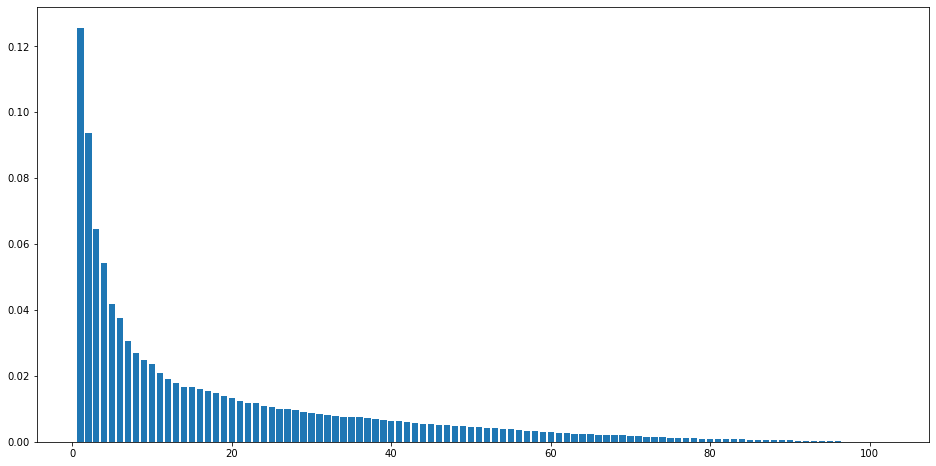

In [92]:
# Plotting variance vs components
plt.figure(figsize=(16,8))
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.show()

In [93]:
# Getting cumluative sum of variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

array([0.12565812, 0.21919645, 0.28361678, 0.33799279, 0.37992929,
       0.41761414, 0.44831927, 0.47537209, 0.50006462, 0.52353633,
       0.54439846, 0.56342081, 0.5812228 , 0.5979356 , 0.61445393,
       0.6304574 , 0.64577588, 0.66071848, 0.67469936, 0.68809161,
       0.70034565, 0.71221281, 0.7238735 , 0.7346465 , 0.74518492,
       0.75510188, 0.76490237, 0.7744797 , 0.78357571, 0.79242469,
       0.80085551, 0.80885016, 0.81663597, 0.8242313 , 0.831752  ,
       0.83915933, 0.8462552 , 0.85324727, 0.85998162, 0.86640164,
       0.87262762, 0.87865987, 0.88447848, 0.88996595, 0.89522253,
       0.90039268, 0.90543932, 0.91034908, 0.9150892 , 0.91958101,
       0.92400377, 0.92832258, 0.9324142 , 0.93637163, 0.94020752,
       0.9437959 , 0.94718894, 0.95048637, 0.95355382, 0.95646888,
       0.95925692, 0.96190393, 0.9643568 , 0.96675337, 0.96904925,
       0.97123303, 0.97335464, 0.97528669, 0.97720786, 0.97899311,
       0.98075932, 0.98236588, 0.98392444, 0.98537206, 0.98658

#### Making the scree plot:

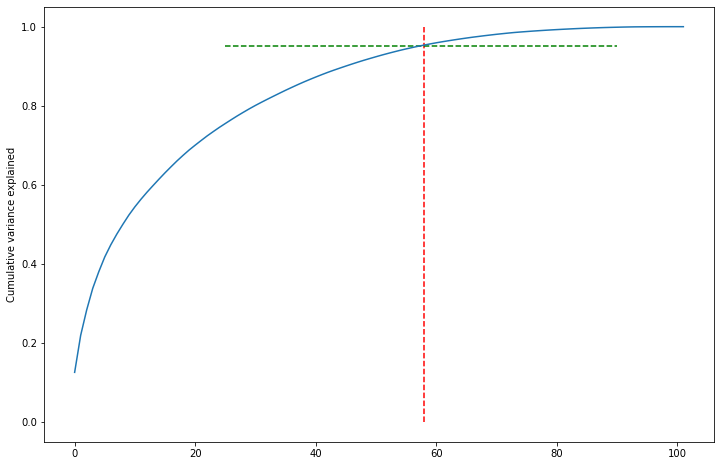

In [94]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=58, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=90, xmin=25, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

Looks like 58 componenets can explain 95 perecent variance.

#### Performing PCA with 58 components:

In [95]:
pca_final = IncrementalPCA(n_components=58)

In [96]:
X_train_pca = pca_final.fit_transform(X_train_resampled)

In [97]:
# Checking shape of X-train.
X_train_pca.shape

(38496, 58)

In [98]:
# Applying the transformation on the test set

X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(8985, 58)

In [99]:
# Checking correlations between components.
corrmat = np.corrcoef(X_train_pca.transpose())

In [100]:
corrmat.shape

(58, 58)

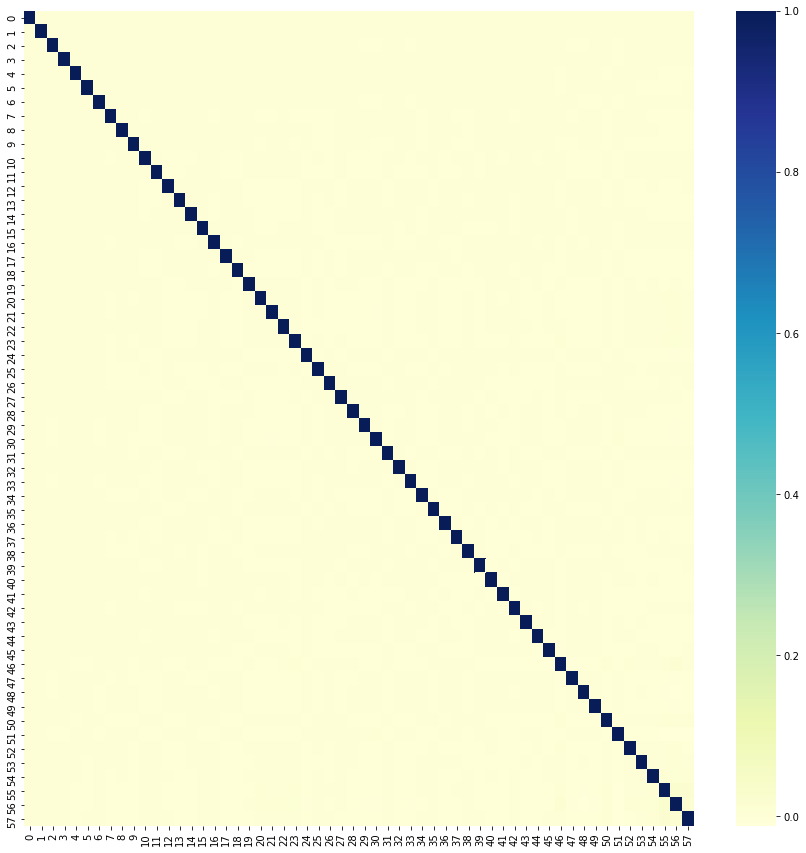

In [101]:
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, cmap="YlGnBu")
plt.show()

As you can see from heatmap correlation between components is very close to zero.

#### Logistic regression with PCA:

In [102]:
# Initializing logistic regression.
logreg_pca = LogisticRegression()

# Fitting model
logmodel = logreg_pca.fit(X_train_pca, y_train_resampled)

##### Predictions on train:

In [103]:
# Making prediction on train
y_train_pred = logmodel.predict(X_train_pca)

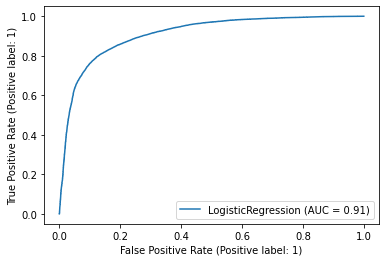

In [104]:
# plotting roc curve.
metrics.plot_roc_curve(logmodel, X_train_pca, y_train_resampled)
plt.show()

In [105]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_resampled, y_train_pred)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [106]:
# Accuracy
"Accuracy score for train : {:.2f}".format(metrics.accuracy_score(y_train_resampled, y_train_pred)*100)

'Accuracy score for train : 83.28'

In [107]:
# Recall/sensitivity
"Recall/Sensitivity for train : {:.2f}".format(metrics.recall_score(y_train_resampled, y_train_pred)*100)

'Recall/Sensitivity for train : 84.17'

In [108]:
# Specificity
"Specificity for train : {:.2f}".format(TN/ float(TN + FP))

'Specificity for train : 0.82'

In [109]:
print ('\n clasification report:\n', metrics.classification_report(y_train_resampled, y_train_pred))


 clasification report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83     19248
           1       0.83      0.84      0.83     19248

    accuracy                           0.83     38496
   macro avg       0.83      0.83      0.83     38496
weighted avg       0.83      0.83      0.83     38496



##### Prdictions on test:

In [110]:
# Making prediction on test
y_test_pred = logmodel.predict(X_test_pca)

In [111]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [112]:
# Accuracy
"Accuracy score for test : {:.2f}".format(metrics.accuracy_score(y_test, y_test_pred)*100)

'Accuracy score for test : 82.10'

In [113]:
# Recall
"Recall/Sensitivity score for test : {:.2f}".format(metrics.recall_score(y_test, y_test_pred)*100)

'Recall/Sensitivity score for test : 81.63'

In [114]:
# Specificity
"Specificity for test : {:.2f}".format(TN/ float(TN + FP))

'Specificity for test : 0.82'

In [115]:
print ('\n clasification report:\n', metrics.classification_report(y_test, y_test_pred))


 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.82      0.89      8250
           1       0.29      0.82      0.43       735

    accuracy                           0.82      8985
   macro avg       0.63      0.82      0.66      8985
weighted avg       0.92      0.82      0.86      8985



##### Results:

Logistic regression with PCA model summary:

Accuracy score for train : 83.28

Recall/Sensitivity for train : 84.17

Specificity for train : 0.82

Accuracy score for test : 82.10

Recall/Sensitivity score for test : 81.63

Specificity for test : 0.82

#### Decision tree with PCA:

In [116]:
# Initializing decision tree.
dt = DecisionTreeClassifier(random_state=42)

##### Hyper-parameter tuning:

In [117]:
# Creating dictionary for parameters
params = {
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [50,100,150],
    'min_samples_split': [50,100,150],
}

In [118]:
# Initializing grid search cv
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="recall")

In [119]:
%%time
grid_search.fit(X_train_pca, y_train_resampled)

Fitting 4 folds for each of 27 candidates, totalling 108 fits
Wall time: 38.1 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [50, 100, 150],
                         'min_samples_split': [50, 100, 150]},
             scoring='recall', verbose=1)

In [120]:
grid_search.best_score_

0.8476724854530341

In [121]:
# Getting best estimator
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=15, min_samples_leaf=50, min_samples_split=50,
                       random_state=42)

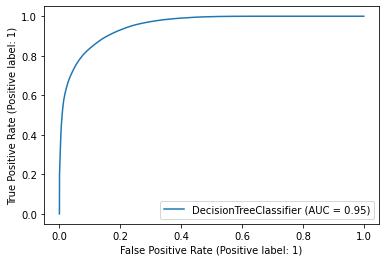

In [122]:
# Plotting roc curve.
metrics.plot_roc_curve(dt_best, X_train_pca, y_train_resampled)
plt.show()

In [123]:
# Making predictions on train
y_train_pred_dt = dt_best.predict(X_train_pca)

In [124]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_resampled, y_train_pred_dt)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [125]:
# Accuracy
"Accuracy score for train : {:.2f}".format(metrics.accuracy_score(y_train_resampled, y_train_pred_dt)*100)

'Accuracy score for train : 87.23'

In [126]:
# Recall/Sensitivity:
"Recall/Sensitivity for train : {:.2f}".format(metrics.recall_score(y_train_resampled, y_train_pred_dt)*100)

'Recall/Sensitivity for train : 88.24'

In [127]:
# Specificity
"Specificity for train : {:.2f}".format(TN/ float(TN + FP))

'Specificity for train : 0.86'

In [128]:
print ('\n clasification report:\n', metrics.classification_report(y_train_resampled, y_train_pred_dt))


 clasification report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87     19248
           1       0.86      0.88      0.87     19248

    accuracy                           0.87     38496
   macro avg       0.87      0.87      0.87     38496
weighted avg       0.87      0.87      0.87     38496



##### Predictions on test:

In [129]:
y_test_pred_dt = dt_best.predict(X_test_pca)

In [130]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred_dt)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [131]:
# Accuracy
"Accuracy score for test : {:.2f}".format(metrics.accuracy_score(y_test, y_test_pred_dt)*100)

'Accuracy score for test : 82.65'

In [132]:
# Recall
"Recall/Sensitivity score for test : {:.2f}".format(metrics.recall_score(y_test, y_test_pred_dt)*100)

'Recall/Sensitivity score for test : 74.01'

In [133]:
# Specificity
"Specificity for test : {:.2f}".format(TN/ float(TN + FP))

'Specificity for test : 0.83'

In [134]:
print ('\n clasification report:\n', metrics.classification_report(y_test, y_test_pred_dt))


 clasification report:
               precision    recall  f1-score   support

           0       0.97      0.83      0.90      8250
           1       0.28      0.74      0.41       735

    accuracy                           0.83      8985
   macro avg       0.63      0.79      0.65      8985
weighted avg       0.92      0.83      0.86      8985



##### Results:

Decision tree with PCA model summary:

Accuracy score for train : 87.23

Recall/Sensitivity for train : 88.24

Specificity for train : 0.86

Accuracy score for test : 82.65

Recall/Sensitivity score for test : 74.01

Specificity for test : 0.83

#### Random forest with PCA:

In [135]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

##### Hyperparameter tuning:

In [136]:
# Creating parameter dictionary
params_1 = {
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [50,100,150],
    'n_estimators': [100,200,300],
}

In [137]:
grid_search_1 = GridSearchCV(estimator=rf,
                           param_grid=params_1,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="recall")

In [138]:
%%time
grid_search_1.fit(X_train_pca, y_train_resampled)

Fitting 4 folds for each of 27 candidates, totalling 108 fits
Wall time: 10min 16s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [50, 100, 150],
                         'n_estimators': [100, 200, 300]},
             scoring='recall', verbose=1)

In [139]:
grid_search_1.best_score_

0.8516209476309227

In [140]:
# Getting best estimator
rf_best = grid_search_1.best_estimator_
rf_best

RandomForestClassifier(max_depth=15, min_samples_leaf=50, n_estimators=300,
                       n_jobs=-1, random_state=42)

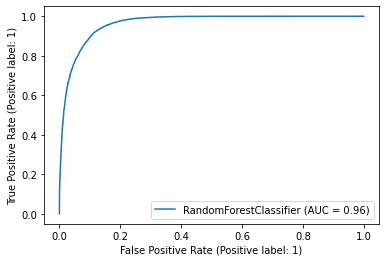

In [141]:
# Plotting roc curve
metrics.plot_roc_curve(rf_best, X_train_pca, y_train_resampled)
plt.show()

In [142]:
# Making predictions on train.
y_train_pred_rf = rf_best.predict(X_train_pca)

In [143]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_resampled, y_train_pred_rf)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [144]:
# Accuracy
"Accuracy score for train : {:.2f}".format(metrics.accuracy_score(y_train_resampled, y_train_pred_rf)*100)

'Accuracy score for train : 89.36'

In [145]:
# Recall
"Recall/Sensitivity for train : {:.2f}".format(metrics.recall_score(y_train_resampled, y_train_pred_rf)*100)

'Recall/Sensitivity for train : 88.15'

In [146]:
# Specificity
"Specificity for train : {:.2f}".format(TN/ float(TN + FP))

'Specificity for train : 0.91'

In [147]:
print ('\n clasification report:\n', metrics.classification_report(y_train_resampled, y_train_pred_rf))


 clasification report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.89     19248
           1       0.90      0.88      0.89     19248

    accuracy                           0.89     38496
   macro avg       0.89      0.89      0.89     38496
weighted avg       0.89      0.89      0.89     38496



##### Predictions on test:

In [148]:
y_test_pred_rf = rf_best.predict(X_test_pca)

In [149]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred_rf)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [150]:
# Accuracy
"Accuracy score for test : {:.2f}".format(metrics.accuracy_score(y_test, y_test_pred_rf)*100)

'Accuracy score for test : 87.81'

In [151]:
# Recall
"Recall/Sensitivity score for test : {:.2f}".format(metrics.recall_score(y_test, y_test_pred_rf)*100)

'Recall/Sensitivity score for test : 71.43'

In [152]:
# Specificity
"Specificity for test : {:.2f}".format(TN/ float(TN + FP))

'Specificity for test : 0.89'

In [153]:
print ('\n clasification report:\n', metrics.classification_report(y_test, y_test_pred_rf))


 clasification report:
               precision    recall  f1-score   support

           0       0.97      0.89      0.93      8250
           1       0.37      0.71      0.49       735

    accuracy                           0.88      8985
   macro avg       0.67      0.80      0.71      8985
weighted avg       0.92      0.88      0.89      8985



##### Resuls:

Random forest with PCA model summary:

Accuracy score for train : 89.36

Recall/Sensitivity for train : 88.15

Specificity for test : 0.91

Accuracy score for test : 87.81

Recall/Sensitivity score for test : 71.43

Specificity for test : 0.89

**Conclusion:**

In this business problem it is crucial to identify high value churners correctly, hence recall should be evaluated.


Logistic regression model with pca is better model among other models at predicting churn with recall
,hence chosen as final predictive model:

Recall for train : 84.17

Recall score for test : 81.63

### Model 2 without PCA:

#### Logistic regression without PCA:

In [154]:
# Checking shape of the data.
X_train_resampled.shape 

(38496, 102)

In [155]:
# Instantiate the model and adding the constant to X_train
log_model = sm.GLM(y_train_resampled,(sm.add_constant(X_train_resampled)), family=sm.families.Binomial())

In [156]:
# Fit the model
log_model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38496
Model:                            GLM   Df Residuals:                    38395
Model Family:                Binomial   Df Model:                          100
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14321.
Date:                Tue, 17 Jan 2023   Deviance:                       28643.
Time:                        21:30:40   Pearson chi2:                 6.62e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1223      0.041     -3.013      0.003      -0.202      -0.043
loc_og_t2t_mou_6         -0.0822      0.038     -2.160      0.031      -0.157      -0.008
loc_og_t2t_mou_7          0.0988      0.042      2.352      0.019       0.016       0.181
loc_og_t2t_mou_8         -0.2263      0.042     -5.374      0.000      -0.309      -0.144
loc_og_t2m_mou_6         -0.2920      0.040     -7.274      0.000      -0.371      -0.213
loc_og_t2m_mou_7         -0.0194      0.043     -0.449      0.653      -0.104       0.065
loc_og_t2m_mou_8         -0.2032      0.049     -4.167      0.000      -0.299      -0.108
loc_og_t2f_mou_6          0.0524      0.027      1.952      0.051      -0.000       0.105
loc_og_t2f_mou_7         -0.0605      0.030     -2.020      0.043      -0.119      -0.002
loc_og_t2f_mou_8         -0.0832      0.030     -2.751      0.006      -0.143      -0.024
loc_og_t2c_mou_6         -0.0408      0.017     -2.451      0.014      -0.074      -0.008
loc_og_t2c_mou_7          0.0025      0.017      0.148      0.883      -0.031       0.036
loc_og_t2c_mou_8          0.0398      0.017      2.410      0.016       0.007       0.072
std_og_t2t_mou_6          0.0312      0.033      0.933      0.351      -0.034       0.097
std_og_t2t_mou_7         -0.0779      0.039     -2.008      0.045      -0.154      -0.002
std_og_t2t_mou_8         -0.2194      0.037     -5.999      0.000      -0.291      -0.148
std_og_t2m_mou_6         -0.0889      0.032     -2.762      0.006      -0.152      -0.026
std_og_t2m_mou_7          0.1969      0.038      5.217      0.000       0.123       0.271
std_og_t2m_mou_8         -0.3065      0.034     -8.971      0.000      -0.373      -0.240
std_og_t2f_mou_6         -0.0027      0.021     -0.124      0.901      -0.045       0.039
std_og_t2f_mou_7          0.0612      0.022      2.759      0.006       0.018       0.105
std_og_t2f_mou_8         -0.0236      0.023     -1.040      0.298      -0.068       0.021
og_others_6              -0.1125      0.017     -6.797      0.000      -0.145      -0.080
og_others_7           -8.128e-19   3.61e-16     -0.002      0.998   -7.09e-16    7.07e-16
og_others_8            3.373e-16   1.89e-16      1.785      0.074   -3.31e-17    7.08e-16
loc_ic_t2t_mou_6          0.1018      0.036      2.819      0.005       0.031       0.173
loc_ic_t2t_mou_7          0.1355      0.040      3.402      0.001       0.057       0.214
loc_ic_t2t_mou_8         -0.4435      0.041    -10.823      0.000      -0.524      -0.363
loc_ic_t2m_mou_6          0.1941      0.044      4.456      0.000       0.109       0.280
loc_ic_t2m_mou_7          0.1725      0.049      3.519      0.000       0.076       0.269
loc_ic_t2m_mou_8         -0.8105      0.053    -15.308      0.000      -0.914      -0.707
loc_ic_t2f_mou_6       

#### Observation:

1. There are few features have positive coefficients and few have negative.
1. Many features have higher p-values and hence became insignificant in the model.

#### Approach:

We'll first eliminate a few features using Recursive Feature Elimination (RFE), and once we have reached a small set of variables to work with, we can then use manual feature elimination (i.e. manually eliminating features based on observing the p-values and VIFs).

In [157]:
# Creating function for vif checking.
def check_vif(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

#### RFE:

In [158]:
# Initializing logistic regression
lr = LogisticRegression()

In [159]:
# Using RFE to reduce features to 15.

rfe = RFE(lr, n_features_to_select = 15)
rfe = rfe.fit(X_train_resampled, y_train_resampled)

In [160]:
list(zip(X_train_resampled.columns, rfe.support_, rfe.ranking_))

[('loc_og_t2t_mou_6', False, 47),
 ('loc_og_t2t_mou_7', False, 46),
 ('loc_og_t2t_mou_8', False, 14),
 ('loc_og_t2m_mou_6', False, 4),
 ('loc_og_t2m_mou_7', False, 77),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 52),
 ('loc_og_t2f_mou_7', False, 53),
 ('loc_og_t2f_mou_8', False, 44),
 ('loc_og_t2c_mou_6', False, 65),
 ('loc_og_t2c_mou_7', False, 84),
 ('loc_og_t2c_mou_8', False, 64),
 ('std_og_t2t_mou_6', False, 70),
 ('std_og_t2t_mou_7', False, 50),
 ('std_og_t2t_mou_8', True, 1),
 ('std_og_t2m_mou_6', False, 51),
 ('std_og_t2m_mou_7', False, 19),
 ('std_og_t2m_mou_8', False, 13),
 ('std_og_t2f_mou_6', False, 86),
 ('std_og_t2f_mou_7', False, 60),
 ('std_og_t2f_mou_8', False, 75),
 ('og_others_6', False, 35),
 ('og_others_7', False, 88),
 ('og_others_8', False, 87),
 ('loc_ic_t2t_mou_6', False, 42),
 ('loc_ic_t2t_mou_7', False, 15),
 ('loc_ic_t2t_mou_8', True, 1),
 ('loc_ic_t2m_mou_6', False, 5),
 ('loc_ic_t2m_mou_7', False, 22),
 ('loc_ic_t2m_mou_8', True, 1),
 ('lo

In [161]:
col = X_train_resampled.columns[rfe.support_]
col

Index(['loc_og_t2m_mou_8', 'std_og_t2t_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'std_ic_t2m_mou_8',
       'last_day_rch_amt_8', 'count_rech_2g_6', 'count_rech_2g_8',
       'sachet_2g_6', 'sachet_2g_8', 'fb_user_8', 'loc_og_mou_diff',
       'std_og_mou_diff', 'total_ic_mou_diff'],
      dtype='object')

In [162]:
X_train_resampled.columns[~rfe.support_]

Index(['loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7',
       'std_og_t2f_mou_8', 'og_others_6', 'og_others_7', 'og_others_8',
       'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_6',
       'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7',
       'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8',
       'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_6',
       'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'ic_others_6', 'ic_others_7',
       'ic_others_8', 'last_day_rch_amt_6', 'last_day_rch_amt_7',
       'count_rech_2g_7', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'arpu_3g_6', 'arpu_3g_7',

In [163]:
# Crearing train dataframe with rfe selected features.
X_train_new = X_train_resampled[col]

##### Model1: With all rfe selected variables:

In [164]:
# Adding a constant.
X_train_sm = sm.add_constant(X_train_new)

## First Logistic regression model
log_model_1 = sm.GLM(y_train_resampled, X_train_sm, family = sm.families.Binomial())
res1 = log_model_1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38496
Model:                            GLM   Df Residuals:                    38480
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15257.
Date:                Tue, 17 Jan 2023   Deviance:                       30515.
Time:                        21:31:20   Pearson chi2:                 5.42e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0683      0.020      3.372      0.001       0.029       0.108
loc_og_t2m_mou_8      -0.5125      0.028    -18.041      0.000      -0.568      -0.457
std_og_t2t_mou_8      -0.2787      0.014    -19.924      0.000      -0.306      -0.251
loc_ic_t2t_mou_8      -0.3886      0.023    -16.582      0.000      -0.435      -0.343
loc_ic_t2m_mou_8      -0.5639      0.033    -17.110      0.000      -0.629      -0.499
loc_ic_t2f_mou_8      -0.2507      0.024    -10.633      0.000      -0.297      -0.205
std_ic_t2m_mou_8      -0.3336      0.018    -18.888      0.000      -0.368      -0.299
last_day_rch_amt_8    -0.4566      0.017    -27.274      0.000      -0.489      -0.424
count_rech_2g_6       -0.4604      0.051     -8.947      0.000      -0.561      -0.360
count_rech_2g_8       -0.9090      0.086    -10.595      0.000      -1.077      -0.741
sachet_2g_6            0.5014      0.051      9.776      0.000       0.401       0.602
sachet_2g_8            0.6164      0.082      7.499      0.000       0.455       0.777
fb_user_8             -1.1446      0.044    -26.006      0.000      -1.231      -1.058
loc_og_mou_diff       -0.1307      0.019     -7.064      0.000      -0.167      -0.094
std_og_mou_diff       -0.3682      0.021    -17.927      0.000      -0.408      -0.328
total_ic_mou_diff     -0.3769      0.022    -17.175      0.000      -0.420      -0.334
======================================================================================
"""

In [165]:
# Checking VIF of all variables
vif_1 = check_vif(X_train_new)
vif_1

,Features,VIF
8,count_rech_2g_8,18.98
10,sachet_2g_8,17.77
7,count_rech_2g_6,12.07
9,sachet_2g_6,11.86
3,loc_ic_t2m_mou_8,2.87
0,loc_og_t2m_mou_8,2.38
2,loc_ic_t2t_mou_8,1.59
11,fb_user_8,1.48
4,loc_ic_t2f_mou_8,1.39
6,last_day_rch_amt_8,1.32


**Insight**: Variable **count_rech_2g_8** has high VIF 18.98. Reducing VIFs to less than ~5 for handling Multi-collenarity and for P-values to make Statistical sense

##### Model2:

In [166]:
# Dropping count_rech_2g_8
X_train_new.drop("count_rech_2g_8", axis=1, inplace=True)

In [167]:
# Adding a constant.
X_train_sm = sm.add_constant(X_train_new)

## First Logistic regression model
log_model_2 = sm.GLM(y_train_resampled, X_train_sm, family = sm.families.Binomial())
res2 = log_model_2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38496
Model:                            GLM   Df Residuals:                    38481
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15321.
Date:                Tue, 17 Jan 2023   Deviance:                       30642.
Time:                        21:31:21   Pearson chi2:                 5.34e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1403      0.019      7.361      0.000       0.103       0.178
loc_og_t2m_mou_8      -0.5187      0.028    -18.255      0.000      -0.574      -0.463
std_og_t2t_mou_8      -0.2815      0.014    -20.110      0.000      -0.309      -0.254
loc_ic_t2t_mou_8      -0.3936      0.023    -16.776      0.000      -0.440      -0.348
loc_ic_t2m_mou_8      -0.5660      0.033    -17.210      0.000      -0.630      -0.502
loc_ic_t2f_mou_8      -0.2520      0.024    -10.697      0.000      -0.298      -0.206
std_ic_t2m_mou_8      -0.3373      0.018    -19.102      0.000      -0.372      -0.303
last_day_rch_amt_8    -0.4583      0.017    -27.352      0.000      -0.491      -0.425
count_rech_2g_6       -0.6264      0.048    -13.029      0.000      -0.721      -0.532
sachet_2g_6            0.6602      0.048     13.717      0.000       0.566       0.755
sachet_2g_8           -0.2258      0.019    -11.944      0.000      -0.263      -0.189
fb_user_8             -1.3532      0.040    -33.652      0.000      -1.432      -1.274
loc_og_mou_diff       -0.1326      0.019     -7.132      0.000      -0.169      -0.096
std_og_mou_diff       -0.3638      0.020    -17.763      0.000      -0.404      -0.324
total_ic_mou_diff     -0.3771      0.022    -17.261      0.000      -0.420      -0.334
======================================================================================
"""

In [168]:
# Checking VIF of all variables
vif_2 = check_vif(X_train_new)
vif_2

,Features,VIF
7,count_rech_2g_6,10.21
8,sachet_2g_6,10.21
3,loc_ic_t2m_mou_8,2.86
0,loc_og_t2m_mou_8,2.38
2,loc_ic_t2t_mou_8,1.59
9,sachet_2g_8,1.48
4,loc_ic_t2f_mou_8,1.39
10,fb_user_8,1.33
6,last_day_rch_amt_8,1.31
13,total_ic_mou_diff,1.29


**Insight**: Variable **count_rech_2g_6** has high VIF 10.21. Reducing VIFs to less than ~5 for handling Multi-collenarity and for P-values to make Statistical sense

##### Model3:

In [169]:
# Dropping count_rech_2g_6
X_train_new.drop("count_rech_2g_6", axis=1, inplace=True)

In [170]:
# Adding a constant.
X_train_sm = sm.add_constant(X_train_new)

## First Logistic regression model
log_model_3 = sm.GLM(y_train_resampled, X_train_sm, family = sm.families.Binomial())
res3 = log_model_3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38496
Model:                            GLM   Df Residuals:                    38482
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15408.
Date:                Tue, 17 Jan 2023   Deviance:                       30816.
Time:                        21:31:21   Pearson chi2:                 5.42e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1733      0.019      9.176      0.000       0.136       0.210
loc_og_t2m_mou_8      -0.5052      0.028    -17.872      0.000      -0.561      -0.450
std_og_t2t_mou_8      -0.2665      0.014    -19.133      0.000      -0.294      -0.239
loc_ic_t2t_mou_8      -0.3943      0.023    -16.847      0.000      -0.440      -0.348
loc_ic_t2m_mou_8      -0.5735      0.033    -17.472      0.000      -0.638      -0.509
loc_ic_t2f_mou_8      -0.2591      0.023    -11.033      0.000      -0.305      -0.213
std_ic_t2m_mou_8      -0.3273      0.018    -18.617      0.000      -0.362      -0.293
last_day_rch_amt_8    -0.4479      0.017    -26.819      0.000      -0.481      -0.415
sachet_2g_6            0.0757      0.017      4.460      0.000       0.042       0.109
sachet_2g_8           -0.2155      0.019    -11.458      0.000      -0.252      -0.179
fb_user_8             -1.4468      0.040    -36.623      0.000      -1.524      -1.369
loc_og_mou_diff       -0.1393      0.019     -7.480      0.000      -0.176      -0.103
std_og_mou_diff       -0.3851      0.021    -18.738      0.000      -0.425      -0.345
total_ic_mou_diff     -0.3700      0.022    -16.971      0.000      -0.413      -0.327
======================================================================================
"""

In [171]:
# Checking VIF of all variables
vif_3 = check_vif(X_train_new)
vif_3

,Features,VIF
3,loc_ic_t2m_mou_8,2.86
0,loc_og_t2m_mou_8,2.37
2,loc_ic_t2t_mou_8,1.59
8,sachet_2g_8,1.48
4,loc_ic_t2f_mou_8,1.39
7,sachet_2g_6,1.38
6,last_day_rch_amt_8,1.31
12,total_ic_mou_diff,1.29
9,fb_user_8,1.28
10,loc_og_mou_diff,1.25


**All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only**

In [172]:
# Getting the predicted values on the train set
y_train_resampled_pred = res3.predict(X_train_sm)
y_train_resampled_pred[:10]

0    0.466902
1    0.406573
2    0.401865
3    0.003232
4    0.221228
5    0.759443
6    0.015727
7    0.014820
8    0.149416
9    0.924346
dtype: float64

In [173]:
# # Creating a dataframe with the churn and churn prob
y_train_pred= pd.DataFrame({'Churn':y_train_resampled.values, 'Churn_Prob':y_train_resampled_pred})
y_train_pred['CustID'] = y_train_resampled.index
y_train_pred.head()

,Churn,Churn_Prob,CustID
0,0,0.466902,0
1,0,0.406573,1
2,0,0.401865,2
3,0,0.003232,3
4,0,0.221228,4


###### Finding Optimal Probablity Cutoff Point:

In [174]:
# Creating columns for different probablity cutoffs
cutoff = [float(p/10) for p in range(10)]

for i in cutoff:
    y_train_pred[i] = y_train_pred['Churn_Prob'].map(lambda x : 1 if x > i else 0)
    
y_train_pred.head()

,Churn,Churn_Prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.466902,0,1,1,1,1,1,0,0,0,0,0
1,0,0.406573,1,1,1,1,1,1,0,0,0,0,0
2,0,0.401865,2,1,1,1,1,1,0,0,0,0,0
3,0,0.003232,3,1,0,0,0,0,0,0,0,0,0
4,0,0.221228,4,1,1,1,0,0,0,0,0,0,0


Let's calculate the accuracy sensitivity and specificity for various probability cutoffs.

In [175]:
# Creating a dataframe
cutoff_df = pd.DataFrame(columns=['probability', 'accuracy', 'sensitivity', 'specificity'])

for i in cutoff:
    cm1 = metrics.confusion_matrix(y_train_pred['Churn'], y_train_pred[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0  0.0          0.500000  1.000000     0.000000   
0.1  0.1          0.686227  0.974647     0.397808   
0.2  0.2          0.753455  0.949345     0.557564   
0.3  0.3          0.792706  0.914796     0.670615   
0.4  0.4          0.813331  0.875675     0.750987   
0.5  0.5          0.824112  0.832346     0.815877   
0.6  0.6          0.827073  0.780808     0.873337   
0.7  0.7          0.821488  0.729946     0.913030   
0.8  0.8          0.794550  0.640274     0.948826   
0.9  0.9          0.647288  0.311773     0.982803   


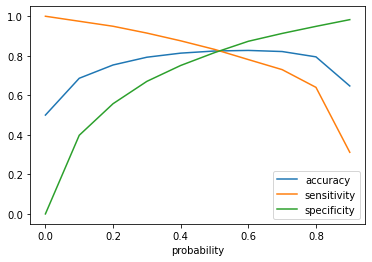

In [176]:
# Plotting accuracy, sensitivity and specificity for different probabilities.
cutoff_df.plot('probability', ['accuracy','sensitivity','specificity'])
plt.show()

At point ~0.5 where the three parameters cut each other, we can see that there is a balance bethween sensitivity and specificity with a good accuracy.

Here we are intended to acheive better sensitivity than accuracy and specificity. Though as per the above curve, we should take 0.5 as the optimum probability cutoff, we are taking *0.4* for acheiving higher sensitivity, which is our main goal.

In [177]:
# Creating a column with name "predicted", which is the predicted value for 0.4 cutoff 
y_train_pred['predicted'] = y_train_pred['Churn_Prob'].map(lambda x: 1 if x > 0.4 else 0)
y_train_pred.head()

,Churn,Churn_Prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0,0.466902,0,1,1,1,1,1,0,0,0,0,0,1
1,0,0.406573,1,1,1,1,1,1,0,0,0,0,0,1
2,0,0.401865,2,1,1,1,1,1,0,0,0,0,0,1
3,0,0.003232,3,1,0,0,0,0,0,0,0,0,0,0
4,0,0.221228,4,1,1,1,0,0,0,0,0,0,0,0


In [178]:
# Confusion metrics
confusion = metrics.confusion_matrix(y_train_pred['Churn'], y_train_pred['predicted'])
print(confusion)

[[14455  4793]
 [ 2393 16855]]


In [179]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [180]:
# Accuracy
print("Accuracy:",metrics.accuracy_score(y_train_pred['Churn'], y_train_pred['predicted']))

# Sensitivity
print("Sensitivity:",TP / float(TP+FN))

# Specificity
print("Specificity:", TN / float(TN+FP))

Accuracy: 0.813331255195345
Sensitivity: 0.8756753948462178
Specificity: 0.7509871155444722


In [181]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

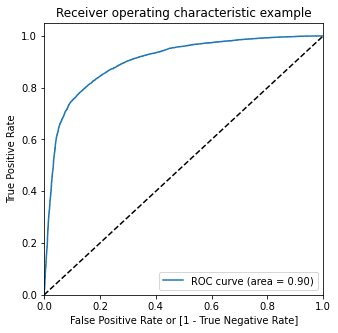

In [182]:
draw_roc(y_train_pred['Churn'], y_train_pred['Churn_Prob'])

#### AUC = 0.90

In [183]:
X_test.shape, y_test.shape

((8985, 102), (8985,))

In [184]:
X_test.shape

(8985, 102)

In [185]:
X_test.head()

,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,ic_others_6,ic_others_7,ic_others_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
97995,-0.582706,-0.510081,-0.455893,0.182083,-0.016081,-0.052565,-0.488371,-0.472709,-0.414485,-0.446138,-0.454157,-0.379485,-0.601364,-0.566992,-0.432174,-0.669678,-0.619145,-0.480558,-0.318087,-0.313026,-0.192888,0.153283,0.0,0.0,0.266699,-0.404808,-0.375929,-0.378720,-0.360615,-0.517100,-0.307122,-0.505281,-0.449836,-0.592436,-0.565462,-0.442477,-0.681860,-0.638932,-0.503265,-0.375339,-0.370643,-0.310196,-0.406858,-0.371829,-0.318677,-0.529657,1.025065,1.253129,0.307800,1.084373,0.451660,1.26823,3.149900,1.642307,0.225003,0.924042,0.415906,0.176756,0.922521,0.472601,-0.377587,-0.371971,-0.306148,0.530480,1.216679,0.545525,-0.420254,-0.396703,-0.328409,3.445020,3.630838,4.472612,1.0,1.0,1.0,-0.997088,1.103286,0.875308,1.348799,0.171835,0.371893,0.306116,0.156762,0.168989,0.049164,0.452340,0.096023,0.213583,0.411832,-0.116031,0.249002,0.117528,0.231937,0.004336,0.223275,0.326086,0.380852,-0.42639,0.305341,-1.001156,0.221421,-0.226839
72102,0.324019,-0.275714,-0.145617,1.319059,1.616150,1.715174,0.024599,0.247037,0.535753,-0.446138,-0.454157,-0.379485,-0.487267,-0.488941,-0.257378,-0.157865,-0.049111,0.536939,-0.318087,-0.313026,-0.270653,-0.488621,0.0,0.0,-0.622226,-0.665274,-0.450312,-0.467760,-0.596004,-0.497658,0.007021,-0.057108,0.095600,1.186496,-0.169570,1.496329,-0.681860,-0.638932,-0.270592,-0.375339,0.082146,-0.310196,-0.406858,-0.371829,-0.318677,0.320674,0.446077,0.961362,-0.530118,-0.524332,-0.444009,-0.49979,-0.471254,-0.380058,-0.460645,-0.435006,-0.364630,-0.485844,-0.454032,-0.376178,-0.377587,-0.371971,-0.306148,-0.454874,-0.433993,-0.375146,-0.420254,-0.396703,-0.328409,-0.329336,-0.308418,-0.238357,0.0,0.0,0.0,2.459779,-0.388091,-0.429427,-0.436605,0.259730,0.266005,0.382377,-0.223804,-0.833143,0.119551,0.568452,0.096023,0.187229,0.538579,0.210572,0.420558,0.141324,0.231937,0.338698,0.706052,0.585230,0.859101,0.25114,0.305341,0.293113,0.236278,0.199906
93057,-0.687289,-0.621117,-0.543517,-0.768422,-0.733719,-0.604633,-0.488371,-0.472709,-0.414485,-0.446138,-0.454157,1.373624,2.040714,2.887401,3.706666,0.027227,0.369086,0.652160,-0.318087,-0.313026,-0.270653,-0.488621,0.0,0.0,-0.769185,-0.744214,-0.597947,-0.860450,-0.758173,-0.648612,-0.521094,-0.505281,-0.418975,-0.529012,-0.562315,-0.071923,-0.585241,-0.545799,-0.401116,-0.375339,-0.370643,-0.310196,-0.406858,-0.371829,-0.318677,-0.529657,0.446077,-0.099611,-0.530118,-0.524332,-0.444009,-0.49979,-0.471254,-0.380058,-0.460645,-0.435006,-

In [186]:
# Taking only the columns, which are selected in the train set after removing insignificant and multicollinear variables

X_test = X_test[X_train_new.columns]

In [187]:
# Adding constant on the test set
X_test_sm = sm.add_constant(X_test)

##### Predictions on the test set with final model:

In [188]:
# Predict on the test set
y_test_pred = res3.predict(X_test_sm)

In [189]:
y_test_pred.head()

97995    0.226701
72102    0.300926
93057    0.516546
8496     0.048951
33668    0.020146
dtype: float64

In [190]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
97995,0.226701
72102,0.300926
93057,0.516546
8496,0.048951
33668,0.020146


In [191]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [192]:
y_pred_1.head()

,0
0,0.226701
1,0.300926
2,0.516546
3,0.048951
4,0.020146


In [193]:
y_test_df.head()

,churn,CustID
0,0,97995
1,0,72102
2,0,93057
3,0,8496
4,0,33668


In [194]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,churn,CustID,0
0,0,97995,0.226701
1,0,72102,0.300926
2,0,93057,0.516546
3,0,8496,0.048951
4,0,33668,0.020146


In [195]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['CustID','churn','Churn_Prob'], axis=1)
y_pred_final.head()

,CustID,churn,Churn_Prob
0,97995,0,0.226701
1,72102,0,0.300926
2,93057,0,0.516546
3,8496,0,0.048951
4,33668,0,0.020146


In [196]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.4 else 0)
y_pred_final.head()

,CustID,churn,Churn_Prob,final_predicted
0,97995,0,0.226701,0
1,72102,0,0.300926,0
2,93057,0,0.516546,1
3,8496,0,0.048951,0
4,33668,0,0.020146,0


In [197]:
confusion2 = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.final_predicted )
confusion2

array([[6132, 2118],
       [ 110,  625]], dtype=int64)

In [198]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_pred_final.churn, y_pred_final.final_predicted))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.752031163049527
Sensitivity:- 0.8756753948462178
Specificity:- 0.7509871155444722


**Model summary**

#### Train set with cutoff 0.4

Accuracy = 0.81

Sensitivity = 0.88

Specificity = 0.75

#### Test set with cutoff 0.4

m
Accuracy = 0.75

Sensitivity = 0.87

Specificity = 0.75

In [199]:
# Summary of final model.
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38496
Model:                            GLM   Df Residuals:                    38482
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15408.
Date:                Tue, 17 Jan 2023   Deviance:                       30816.
Time:                        21:37:53   Pearson chi2:                 5.42e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1733      0.019      9.176      0.000       0.136       0.210
loc_og_t2m_mou_8      -0.5052      0.028    -17.872      0.000      -0.561      -0.450
std_og_t2t_mou_8      -0.2665      0.014    -19.133      0.000      -0.294      -0.239
loc_ic_t2t_mou_8      -0.3943      0.023    -16.847      0.000      -0.440      -0.348
loc_ic_t2m_mou_8      -0.5735      0.033    -17.472      0.000      -0.638      -0.509
loc_ic_t2f_mou_8      -0.2591      0.023    -11.033      0.000      -0.305      -0.213
std_ic_t2m_mou_8      -0.3273      0.018    -18.617      0.000      -0.362      -0.293
last_day_rch_amt_8    -0.4479      0.017    -26.819      0.000      -0.481      -0.415
sachet_2g_6            0.0757      0.017      4.460      0.000       0.042       0.109
sachet_2g_8           -0.2155      0.019    -11.458      0.000      -0.252      -0.179
fb_user_8             -1.4468      0.040    -36.623      0.000      -1.524      -1.369
loc_og_mou_diff       -0.1393      0.019     -7.480      0.000      -0.176      -0.103
std_og_mou_diff       -0.3851      0.021    -18.738      0.000      -0.425      -0.345
total_ic_mou_diff     -0.3700      0.022    -16.971      0.000      -0.413      -0.327
======================================================================================
"""

###  Recommendations:

Top predictors

Below are few top variables selected in the logistic regression model.

#### Variables Coefficients


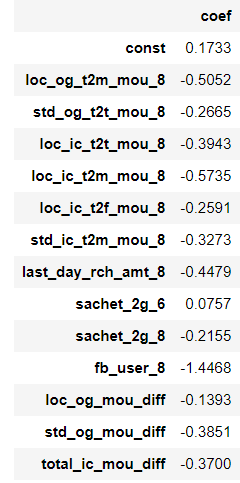

#### Insights:
    
We can see most of the top variables have negative coefficients. That means, the variables are inversely correlated with the churn probablity.

E.g.:-

1. If the local outgoing minutes of usage (loc_og_t2m_mou_8) and STD outgoing minutes of usage(std_og_t2t_mou_8) are lesser in the month of August than any other month, then there is a higher chance that the customer is likely to churn.

2. If there is drop in incoming minutes of usage, it is highly likey customer will churn.

3. If there is less number of recharges than before then customer more likely to churn

#### Suggestions:
    
1. Telecom company needs to pay attention to the roaming rates. They need to provide good offers to the customers who are using services from a roaming zone.

2. The company needs to focus on the STD and ISD rates. Perhaps, the rates are too high. Provide them with some kind of STD and ISD packages.

3. To look into both of the issues stated above, it is desired that the telecom company collects customer query and complaint data and work on their services according to the needs of customers.

4. Company needs to watch out for drop in incoming minutes of usage ,ougoing minutes of usage, number of recharges by customer.These are strong indicators of churn.

5. Logistic regression with pca has high recall at predicting customer churn with train recall 84.17 and test recall 81.63.
